In [1]:
from pathlib import Path # to interact with file system.

import numpy as np # for working with arrays.
import pandas as pd # for working with data frames (tables).

from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split # for data partition.
from sklearn.metrics import r2_score # to identify r_squared for regression model.
from sklearn.linear_model import LinearRegression # for linear regression model.

%matplotlib inline 
#renders the figure in a notebook
import matplotlib.pylab as plt
import seaborn as sns
import plotly.express as px


The dataset contains information about layoffs across various companies, containing the following attributes:

1. **Company**: Denotes the name of the company where the layoffs occurred.
2. **Location_HQ**: Indicates the headquarters location of the company.
3. **Industry**: Describes the sector or industry to which the company belongs.
4. **Laid_Off_Count**: Reflects the number of employees affected by the layoffs within the company.
5. **Percentage**: Represents the proportion of the company's workforce that was subject to layoffs.
6. **Date**: Specifies the date when the layoffs were executed.
7. **Funds_Raised**: Provides details regarding the amount of funds raised by the company.
8. **Stage**: Illustrates the developmental or growth stage of the company.
9. **Country**: Specifies the country in which the company is situated.

## Analysis on Layoff Data (2020-2024):

### 1.What are the primary industries experiencing layoffs, and are there any common factors among them?
### 2.What Are the Top Layoff Industries by Country and visualize the top 6 layoff Industries in each Country?
### 3.Which Industries Experienced Layoffs in the Year 2020, and How Did This Vary Across Different Countries?
### 4.Which Industries Experienced the Highest Number of Layoffs in the Years 2020, 2021, 2023, and 2024 Across  the Countries of the United States, India, Germany, and the United Kingdom?
### 5.Is there a correlation between the stage of company development and the likelihood of layoffs?
### 6.How does the layoff trend vary over different time periods?
### 7.What is the distribution of layoffs across different days of the week, and which day experiences the highest occurrence of layoffs?
### 8.Identifying the ten companies with the highest number of layoffs.
### 9.Identifying Top 15 Location_HQ with highest layoffs?
### 10.How does the company's stage of development (e.g., early-stage, growth-stage) relate to the layoff count?
### 11.Is there a correlation between the percentage of layoffs and the amount of funds raised by the company?
### 12.Are there any outliers in the Layoff Count?
### 13.How do different stages of company development compare in terms of layoff counts, percentage of layoffs, and funds raised?
### 14.Which country had the highest layoffs?
### 15.Let's do more analysis on the 'United States' country.

In [2]:
df=pd.read_csv('layoffs_data.csv')

In [3]:
df.head()

Company  Location_HQ        Industry  Percentage        Date  \
0           Fisker  Los Angeles  Transportation        0.15  2024-02-29   
1  Electronic Arts  SF Bay Area        Consumer        0.05  2024-02-28   
2           Vacasa     Portland          Travel        0.05  2024-02-28   
3   Treasury Prime  SF Bay Area         Finance        0.40  2024-02-28   
4         Motional       Boston  Transportation        0.05  2024-02-28   

                                              Source  Funds_Raised     Stage  \
0  https://techcrunch.com/2024/02/29/fisker-layof...        1700.0  Post-IPO   
1  https://www.cnbc.com/2024/02/28/ea-layoffs-com...           2.0  Post-IPO   
2  https://www.oregonlive.com/business/2024/02/po...         834.0  Post-IPO   
3  https://www.bankingdive.com/news/treasury-prim...          71.0  Series C   
4  https://techcrunch.com/2024/02/28/hyundai-back...           NaN   Unknown   

            Date_Added        Country  Laid_Off_Count  \
0  2024-02-29 23:35:20  United States             NaN   
1  2024-02-29 00:45:00  United States           670.0   
2  2024-02-29 17:22:37  United States           320.0   
3  2024-02-29 00:48:03  United States            40.0   
4  2024-02-28 18:50:58  United States             NaN   

  List_of_Employees_Laid_Off  
0                    Unknown  
1                    Unknown  
2                    Unknown  
3                    Unknown  
4                    Unknown

In [4]:
df.shape

(3485, 12)

In [5]:
df.columns

Index(['Company', 'Location_HQ', 'Industry', 'Percentage', 'Date', 'Source',
       'Funds_Raised', 'Stage', 'Date_Added', 'Country', 'Laid_Off_Count',
       'List_of_Employees_Laid_Off'],
      dtype='object')

In [6]:
total = df['Laid_Off_Count'].sum()
total

574471.0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3485 entries, 0 to 3484
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company                     3485 non-null   object 
 1   Location_HQ                 3485 non-null   object 
 2   Industry                    3485 non-null   object 
 3   Percentage                  2245 non-null   float64
 4   Date                        3485 non-null   object 
 5   Source                      3485 non-null   object 
 6   Funds_Raised                3115 non-null   float64
 7   Stage                       3485 non-null   object 
 8   Date_Added                  3485 non-null   object 
 9   Country                     3485 non-null   object 
 10  Laid_Off_Count              2290 non-null   float64
 11  List_of_Employees_Laid_Off  3484 non-null   object 
dtypes: float64(3), object(9)
memory usage: 326.8+ KB


Data should be cleaned


In [8]:
df.describe()

Percentage   Funds_Raised  Laid_Off_Count
count  2245.000000    3115.000000     2290.000000
mean      0.278106     776.946387      250.860699
std       0.283833    4800.136787      780.128866
min       0.000000       0.000000        3.000000
25%       0.100000      51.000000       40.000000
50%       0.170000     165.000000       80.000000
75%       0.300000     462.000000      185.750000
max       1.000000  121900.000000    12000.000000

In [9]:
df.drop_duplicates()

Company     Location_HQ        Industry  Percentage        Date  \
0              Fisker     Los Angeles  Transportation        0.15  2024-02-29   
1     Electronic Arts     SF Bay Area        Consumer        0.05  2024-02-28   
2              Vacasa        Portland          Travel        0.05  2024-02-28   
3      Treasury Prime     SF Bay Area         Finance        0.40  2024-02-28   
4            Motional          Boston  Transportation        0.05  2024-02-28   
...               ...             ...             ...         ...         ...   
3480          Service     Los Angeles          Travel        1.00  2020-03-16   
3481     HopSkipDrive     Los Angeles  Transportation        0.10  2020-03-13   
3482      Panda Squad     SF Bay Area        Consumer        0.75  2020-03-13   
3483    Tamara Mellon     Los Angeles          Retail        0.40  2020-03-12   
3484         EasyPost  Salt Lake City       Logistics         NaN  2020-03-11   

                                                 Source  Funds_Raised  \
0     https://techcrunch.com/2024/02/29/fisker-layof...        1700.0   
1     https://www.cnbc.com/2024/02/28/ea-layoffs-com...           2.0   
2     https://www.oregonlive.com/business/2024/02/po...         834.0   
3     https://www.bankingdive.com/news/treasury-prim...          71.0   
4     https://techcrunch.com/2024/02/28/hyundai-back...           NaN   
...                                                 ...           ...   
3480  https://techcrunch.com/2020/03/16/travel-savin...           5.1   
3481  https://layoffs.fyi/2020/04/02/hopskipdrive-la...          45.0   
3482  https://twitter.com/danielsinger/status/123854...           1.0   
3483            https://layoffs.fyi/list/tamara-mellon/          90.0   
3484  https://www.bizjournals.com/louisville/news/20...          12.0   

         Stage           Date_Added        Country  Laid_Off_Count  \
0     Post-IPO  2024-02-29 23:35:20  United States             NaN   
1     Post-IPO  2024-02-29 00:45:00  United States           670.0   
2     Post-IPO  2024-02-29 17:22:37  United States           320.0   
3     Series C  2024-02-29 00:48:03  United States            40.0   
4      Unknown  2024-02-28 18:50:58  United States             NaN   
...        ...                  ...            ...             ...   
3480      Seed  2020-08-31 15:17:26  United States             NaN   
3481   Unknown  2020-04-03 04:47:03  United States             8.0   
3482      Seed  2020-04-17 00:12:49  United States             6.0   
3483  Series C  2020-03-31 16:04:23  United States            20.0   
3484  Series A  2020-03-31 13:21:54  United States            75.0   

     List_of_Employees_Laid_Off  
0                       Unknown  
1                       Unknown  
2                       Unknown  
3                       Unknown  
4                       Unknown  
...                         ...  
3480                    Unknown  
3481                    Unknown  
3482                    Unknown  
3483                    Unknown  
3484                    Unknown  

[3485 rows x 12 columns]

# Data cleaning

In [10]:
df['List_of_Employees_Laid_Off'].nunique()

153

In [11]:
df = df.drop(columns = ['List_of_Employees_Laid_Off','Source'])
df

Company     Location_HQ        Industry  Percentage        Date  \
0              Fisker     Los Angeles  Transportation        0.15  2024-02-29   
1     Electronic Arts     SF Bay Area        Consumer        0.05  2024-02-28   
2              Vacasa        Portland          Travel        0.05  2024-02-28   
3      Treasury Prime     SF Bay Area         Finance        0.40  2024-02-28   
4            Motional          Boston  Transportation        0.05  2024-02-28   
...               ...             ...             ...         ...         ...   
3480          Service     Los Angeles          Travel        1.00  2020-03-16   
3481     HopSkipDrive     Los Angeles  Transportation        0.10  2020-03-13   
3482      Panda Squad     SF Bay Area        Consumer        0.75  2020-03-13   
3483    Tamara Mellon     Los Angeles          Retail        0.40  2020-03-12   
3484         EasyPost  Salt Lake City       Logistics         NaN  2020-03-11   

      Funds_Raised     Stage           Date_Added        Country  \
0           1700.0  Post-IPO  2024-02-29 23:35:20  United States   
1              2.0  Post-IPO  2024-02-29 00:45:00  United States   
2            834.0  Post-IPO  2024-02-29 17:22:37  United States   
3             71.0  Series C  2024-02-29 00:48:03  United States   
4              NaN   Unknown  2024-02-28 18:50:58  United States   
...            ...       ...                  ...            ...   
3480           5.1      Seed  2020-08-31 15:17:26  United States   
3481          45.0   Unknown  2020-04-03 04:47:03  United States   
3482           1.0      Seed  2020-04-17 00:12:49  United States   
3483          90.0  Series C  2020-03-31 16:04:23  United States   
3484          12.0  Series A  2020-03-31 13:21:54  United States   

      Laid_Off_Count  
0                NaN  
1              670.0  
2              320.0  
3               40.0  
4                NaN  
...              ...  
3480             NaN  
3481             8.0  
3482             6.0  
3483            20.0  
3484            75.0  

[3485 rows x 10 columns]

In [12]:
df.tail()

Company     Location_HQ        Industry  Percentage        Date  \
3480        Service     Los Angeles          Travel        1.00  2020-03-16   
3481   HopSkipDrive     Los Angeles  Transportation        0.10  2020-03-13   
3482    Panda Squad     SF Bay Area        Consumer        0.75  2020-03-13   
3483  Tamara Mellon     Los Angeles          Retail        0.40  2020-03-12   
3484       EasyPost  Salt Lake City       Logistics         NaN  2020-03-11   

      Funds_Raised     Stage           Date_Added        Country  \
3480           5.1      Seed  2020-08-31 15:17:26  United States   
3481          45.0   Unknown  2020-04-03 04:47:03  United States   
3482           1.0      Seed  2020-04-17 00:12:49  United States   
3483          90.0  Series C  2020-03-31 16:04:23  United States   
3484          12.0  Series A  2020-03-31 13:21:54  United States   

      Laid_Off_Count  
3480             NaN  
3481             8.0  
3482             6.0  
3483            20.0  
3484            75.0

In [13]:
# "Cleaning" the data -- part 1: converting data types that should be categorical into "category"
df['Company'] = df['Company'].astype('category')
df['Location_HQ'] = df['Location_HQ'].astype('category')
df['Industry'] = df['Industry'].astype('category')
df['Stage'] = df['Stage'].astype('category')
df['Country'] = df['Country'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3485 entries, 0 to 3484
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Company         3485 non-null   category
 1   Location_HQ     3485 non-null   category
 2   Industry        3485 non-null   category
 3   Percentage      2245 non-null   float64 
 4   Date            3485 non-null   object  
 5   Funds_Raised    3115 non-null   float64 
 6   Stage           3485 non-null   category
 7   Date_Added      3485 non-null   object  
 8   Country         3485 non-null   category
 9   Laid_Off_Count  2290 non-null   float64 
dtypes: category(5), float64(3), object(2)
memory usage: 258.8+ KB


Spliting 'Date' column into 4 different columns (Year, Month, Day, Quarter)

In [14]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract year, month, and day into separate columns
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Extract quarter into a separate column
df['Quarter'] = df['Date'].dt.quarter



In [15]:
df.head()

Company  Location_HQ        Industry  Percentage       Date  \
0           Fisker  Los Angeles  Transportation        0.15 2024-02-29   
1  Electronic Arts  SF Bay Area        Consumer        0.05 2024-02-28   
2           Vacasa     Portland          Travel        0.05 2024-02-28   
3   Treasury Prime  SF Bay Area         Finance        0.40 2024-02-28   
4         Motional       Boston  Transportation        0.05 2024-02-28   

   Funds_Raised     Stage           Date_Added        Country  Laid_Off_Count  \
0        1700.0  Post-IPO  2024-02-29 23:35:20  United States             NaN   
1           2.0  Post-IPO  2024-02-29 00:45:00  United States           670.0   
2         834.0  Post-IPO  2024-02-29 17:22:37  United States           320.0   
3          71.0  Series C  2024-02-29 00:48:03  United States            40.0   
4           NaN   Unknown  2024-02-28 18:50:58  United States             NaN   

   Year  Month  Day  Quarter  
0  2024      2   29        1  
1  2024      2   28        1  
2  2024      2   28        1  
3  2024      2   28        1  
4  2024      2   28        1

In [16]:
df = df.drop(columns = ['Date','Date_Added'])
df

Company     Location_HQ        Industry  Percentage  \
0              Fisker     Los Angeles  Transportation        0.15   
1     Electronic Arts     SF Bay Area        Consumer        0.05   
2              Vacasa        Portland          Travel        0.05   
3      Treasury Prime     SF Bay Area         Finance        0.40   
4            Motional          Boston  Transportation        0.05   
...               ...             ...             ...         ...   
3480          Service     Los Angeles          Travel        1.00   
3481     HopSkipDrive     Los Angeles  Transportation        0.10   
3482      Panda Squad     SF Bay Area        Consumer        0.75   
3483    Tamara Mellon     Los Angeles          Retail        0.40   
3484         EasyPost  Salt Lake City       Logistics         NaN   

      Funds_Raised     Stage        Country  Laid_Off_Count  Year  Month  Day  \
0           1700.0  Post-IPO  United States             NaN  2024      2   29   
1              2.0  Post-IPO  United States           670.0  2024      2   28   
2            834.0  Post-IPO  United States           320.0  2024      2   28   
3             71.0  Series C  United States            40.0  2024      2   28   
4              NaN   Unknown  United States             NaN  2024      2   28   
...            ...       ...            ...             ...   ...    ...  ...   
3480           5.1      Seed  United States             NaN  2020      3   16   
3481          45.0   Unknown  United States             8.0  2020      3   13   
3482           1.0      Seed  United States             6.0  2020      3   13   
3483          90.0  Series C  United States            20.0  2020      3   12   
3484          12.0  Series A  United States            75.0  2020      3   11   

      Quarter  
0           1  
1           1  
2           1  
3           1  
4           1  
...       ...  
3480        1  
3481        1  
3482        1  
3483        1  
3484        1  

[3485 rows x 12 columns]

In [17]:
df.tail()

Company     Location_HQ        Industry  Percentage  Funds_Raised  \
3480        Service     Los Angeles          Travel        1.00           5.1   
3481   HopSkipDrive     Los Angeles  Transportation        0.10          45.0   
3482    Panda Squad     SF Bay Area        Consumer        0.75           1.0   
3483  Tamara Mellon     Los Angeles          Retail        0.40          90.0   
3484       EasyPost  Salt Lake City       Logistics         NaN          12.0   

         Stage        Country  Laid_Off_Count  Year  Month  Day  Quarter  
3480      Seed  United States             NaN  2020      3   16        1  
3481   Unknown  United States             8.0  2020      3   13        1  
3482      Seed  United States             6.0  2020      3   13        1  
3483  Series C  United States            20.0  2020      3   12        1  
3484  Series A  United States            75.0  2020      3   11        1

In [18]:
# "Cleaning" the data -- part 2: replacing/imputing missing data
df.isna().sum() # Lets check if we have any missing data 

Company              0
Location_HQ          0
Industry             0
Percentage        1240
Funds_Raised       370
Stage                0
Country              0
Laid_Off_Count    1195
Year                 0
Month                0
Day                  0
Quarter              0
dtype: int64

In [19]:
df.isna().mean()*100

Company            0.000000
Location_HQ        0.000000
Industry           0.000000
Percentage        35.581062
Funds_Raised      10.616930
Stage              0.000000
Country            0.000000
Laid_Off_Count    34.289813
Year               0.000000
Month              0.000000
Day                0.000000
Quarter            0.000000
dtype: float64

In [20]:
# "Cleaning" the data -- part 3
#Filling null values with the median of the columns

# Calculate the mean of each column
column_median = df.median()

# Fill missing values with the median of each column
df_cleaned = df.fillna(value=column_median)

# Display the filled DataFrame
df_cleaned.head()

C:\Users\jasvi\AppData\Local\Temp\ipykernel_47068\1186364208.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  column_median = df.median()


Company  Location_HQ        Industry  Percentage  Funds_Raised  \
0           Fisker  Los Angeles  Transportation        0.15        1700.0   
1  Electronic Arts  SF Bay Area        Consumer        0.05           2.0   
2           Vacasa     Portland          Travel        0.05         834.0   
3   Treasury Prime  SF Bay Area         Finance        0.40          71.0   
4         Motional       Boston  Transportation        0.05         165.0   

      Stage        Country  Laid_Off_Count  Year  Month  Day  Quarter  
0  Post-IPO  United States            80.0  2024      2   29        1  
1  Post-IPO  United States           670.0  2024      2   28        1  
2  Post-IPO  United States           320.0  2024      2   28        1  
3  Series C  United States            40.0  2024      2   28        1  
4   Unknown  United States            80.0  2024      2   28        1

In [21]:
# Convert the column to integer type
df_cleaned['Laid_Off_Count'] = df_cleaned['Laid_Off_Count'].astype(int)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3485 entries, 0 to 3484
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Company         3485 non-null   category
 1   Location_HQ     3485 non-null   category
 2   Industry        3485 non-null   category
 3   Percentage      3485 non-null   float64 
 4   Funds_Raised    3485 non-null   float64 
 5   Stage           3485 non-null   category
 6   Country         3485 non-null   category
 7   Laid_Off_Count  3485 non-null   int32   
 8   Year            3485 non-null   int64   
 9   Month           3485 non-null   int64   
 10  Day             3485 non-null   int64   
 11  Quarter         3485 non-null   int64   
dtypes: category(5), float64(2), int32(1), int64(4)
memory usage: 299.6 KB


In [22]:
total = df_cleaned['Laid_Off_Count'].sum()
total

670071

In [23]:
#replacing/imputing missing data

# For Numerical features: replacing with 0
           
# fixing numericals 
imputer = SimpleImputer(missing_values = np.nan, strategy='constant', fill_value=0)
imputer.fit(df.select_dtypes(include=['float64']))
df[df.select_dtypes(include=['float64']).columns] = imputer.transform(df.select_dtypes(include=['float64']))

# Lets examine the result
df.isna().sum()

Company           0
Location_HQ       0
Industry          0
Percentage        0
Funds_Raised      0
Stage             0
Country           0
Laid_Off_Count    0
Year              0
Month             0
Day               0
Quarter           0
dtype: int64

In [24]:
df.head()

Company  Location_HQ        Industry  Percentage  Funds_Raised  \
0           Fisker  Los Angeles  Transportation        0.15        1700.0   
1  Electronic Arts  SF Bay Area        Consumer        0.05           2.0   
2           Vacasa     Portland          Travel        0.05         834.0   
3   Treasury Prime  SF Bay Area         Finance        0.40          71.0   
4         Motional       Boston  Transportation        0.05           0.0   

      Stage        Country  Laid_Off_Count  Year  Month  Day  Quarter  
0  Post-IPO  United States             0.0  2024      2   29        1  
1  Post-IPO  United States           670.0  2024      2   28        1  
2  Post-IPO  United States           320.0  2024      2   28        1  
3  Series C  United States            40.0  2024      2   28        1  
4   Unknown  United States             0.0  2024      2   28        1

In [25]:
df_cleaned.head()

Company  Location_HQ        Industry  Percentage  Funds_Raised  \
0           Fisker  Los Angeles  Transportation        0.15        1700.0   
1  Electronic Arts  SF Bay Area        Consumer        0.05           2.0   
2           Vacasa     Portland          Travel        0.05         834.0   
3   Treasury Prime  SF Bay Area         Finance        0.40          71.0   
4         Motional       Boston  Transportation        0.05         165.0   

      Stage        Country  Laid_Off_Count  Year  Month  Day  Quarter  
0  Post-IPO  United States              80  2024      2   29        1  
1  Post-IPO  United States             670  2024      2   28        1  
2  Post-IPO  United States             320  2024      2   28        1  
3  Series C  United States              40  2024      2   28        1  
4   Unknown  United States              80  2024      2   28        1

In [26]:
df_cleaned.to_csv('C:\\Users\\jasvi\\Downloads\\Layoff_Project\\Median_layoffdata.csv', index=False)
df.to_csv('C:\\Users\\jasvi\\Downloads\\Layoff_Project\\layoffdata_0.csv', index=False)

The DataFrame `df` has its missing values replaced with '0'.
The DataFrame `df_cleaned` has its missing values replaced with the median of each column.

# Data Visualization

## 1. What are the primary industries experiencing layoffs, and are there any common factors among them?

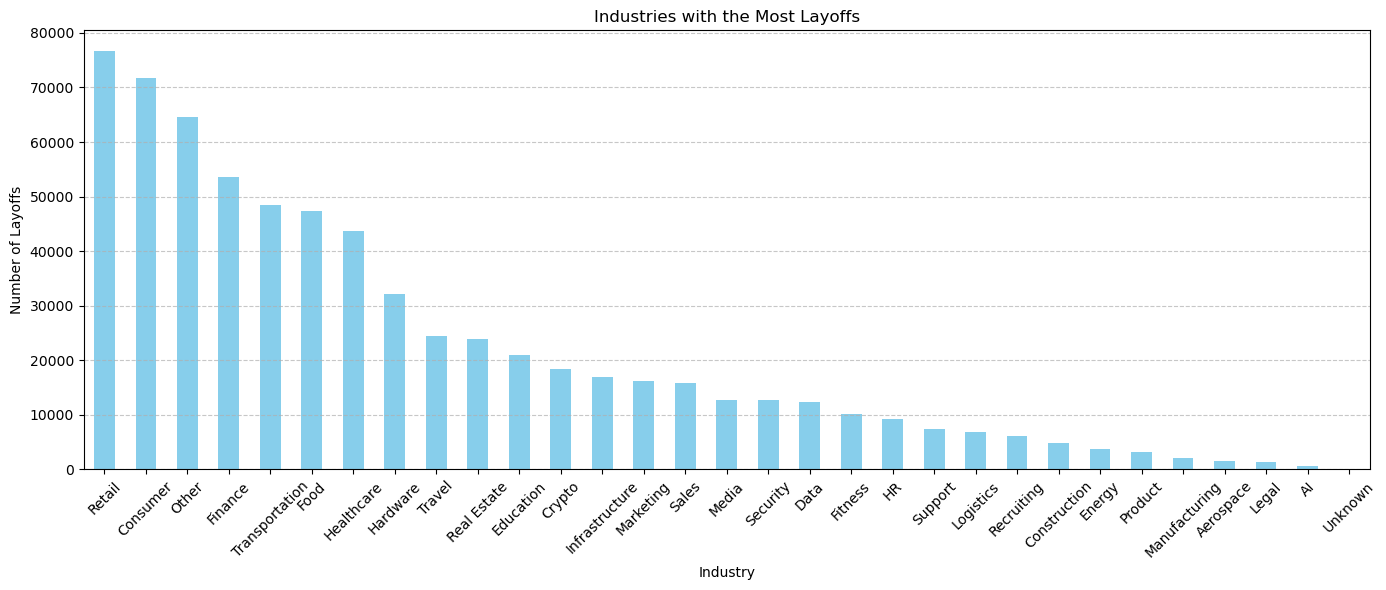

In [27]:
# Grouping by industry and summing the layoffs
industry_layoffs = df_cleaned.groupby('Industry')['Laid_Off_Count'].sum().sort_values(ascending=False)

# Plotting bar chart for industries with the most layoffs
plt.figure(figsize=(14, 6))
industry_layoffs.plot(kind='bar', color='skyblue')
plt.title('Industries with the Most Layoffs')
plt.xlabel('Industry')
plt.ylabel('Number of Layoffs')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout() 
plt.show()

Retail and Consumer Industries had experienced major layoffs overthe period from 2020-2024.

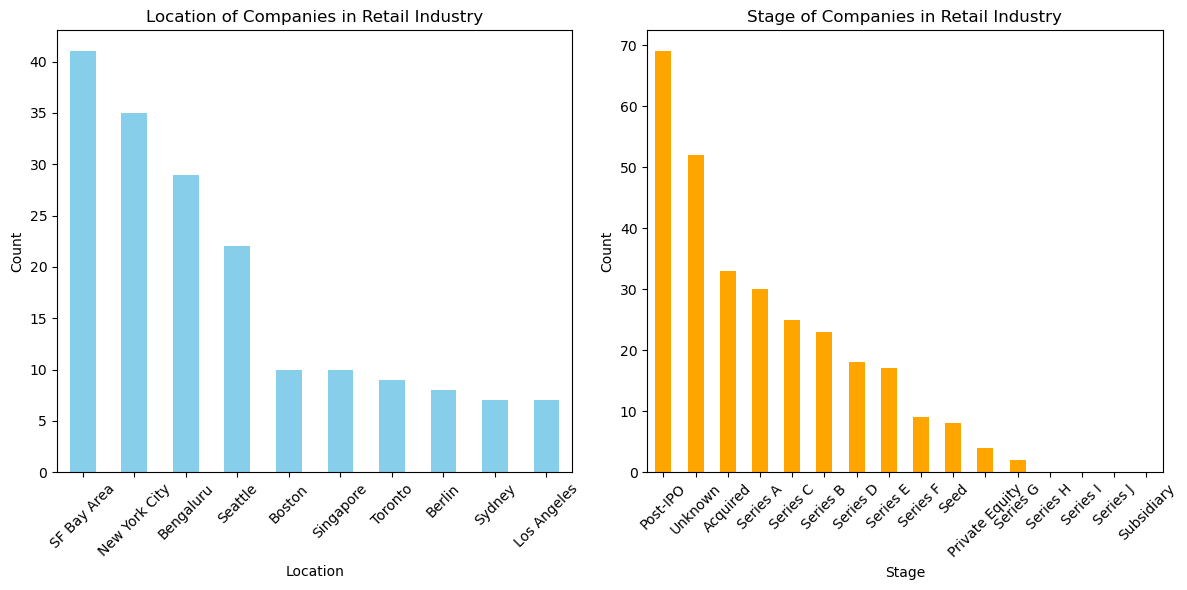

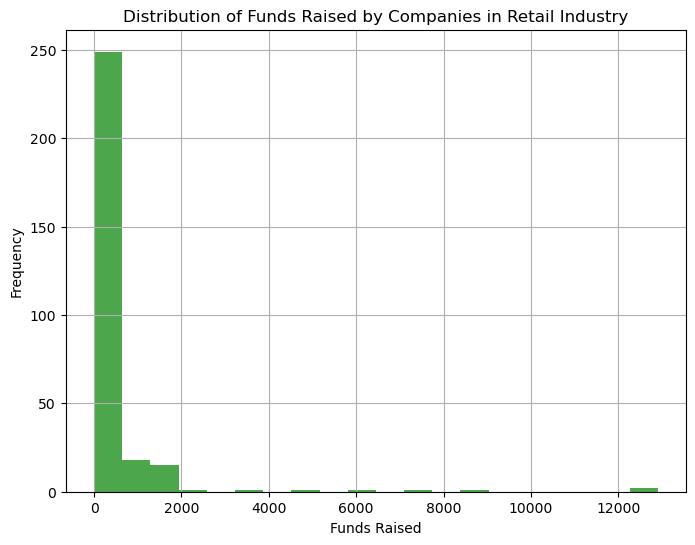

In [28]:
# Filter the dataset for the retail industry
retail_data = df_cleaned[df_cleaned['Industry'] == 'Retail']

# Explore specific factors within the retail industry
# Example: Analyze location and stage of companies
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
retail_data['Location_HQ'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Location of Companies in Retail Industry')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
retail_data['Stage'].value_counts().plot(kind='bar', color='orange')
plt.title('Stage of Companies in Retail Industry')
plt.xlabel('Stage')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Plot funds raised by companies in the retail industry
plt.figure(figsize=(8, 6))
plt.hist(retail_data['Funds_Raised'], bins=20, color='green', alpha=0.7)
plt.title('Distribution of Funds Raised by Companies in Retail Industry')
plt.xlabel('Funds Raised')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


## 2. What Are the Top Layoff Industries by Country and visualize the top 6 layoff Industries in each Country?

In [106]:
# Get the list of unique countries in the dataset
unique_countries = df_cleaned['Country'].unique()

# Loop through each country and analyze layoffs by industry
for country in unique_countries:
    # Filter the data for the current country
    country_data = df_cleaned[df_cleaned['Country'] == country]
    
    # Grouping by Industry and calculating the total layoffs in each industry for the current country
    industry_layoffs = country_data.groupby('Industry')['Laid_Off_Count'].sum().sort_values(ascending=False)
    
    # Display the result
    print(f"Layoffs by Industry in {country}:")
    print(industry_layoffs)
    print("\n")


Layoffs by Industry in United States:
Industry
Consumer          59727
Retail            54527
Other             37464
Hardware          30254
Transportation    29775
Finance           29627
Healthcare        28617
Real Estate       20301
Food              17031
Infrastructure    16551
Sales             15243
Travel            12018
Data              10657
Security          10562
Marketing          9829
Crypto             9378
Fitness            8117
HR                 7451
Media              7016
Support            6527
Recruiting         5281
Logistics          4886
Education          4193
Construction       4050
Product            2892
Manufacturing      1992
Energy             1877
Legal              1306
Aerospace          1107
AI                  310
Unknown              35
Name: Laid_Off_Count, dtype: int32


Layoffs by Industry in Singapore:
Industry
Crypto            3299
Travel            1660
Transportation    1360
Retail             814
Food               545
Consumer      

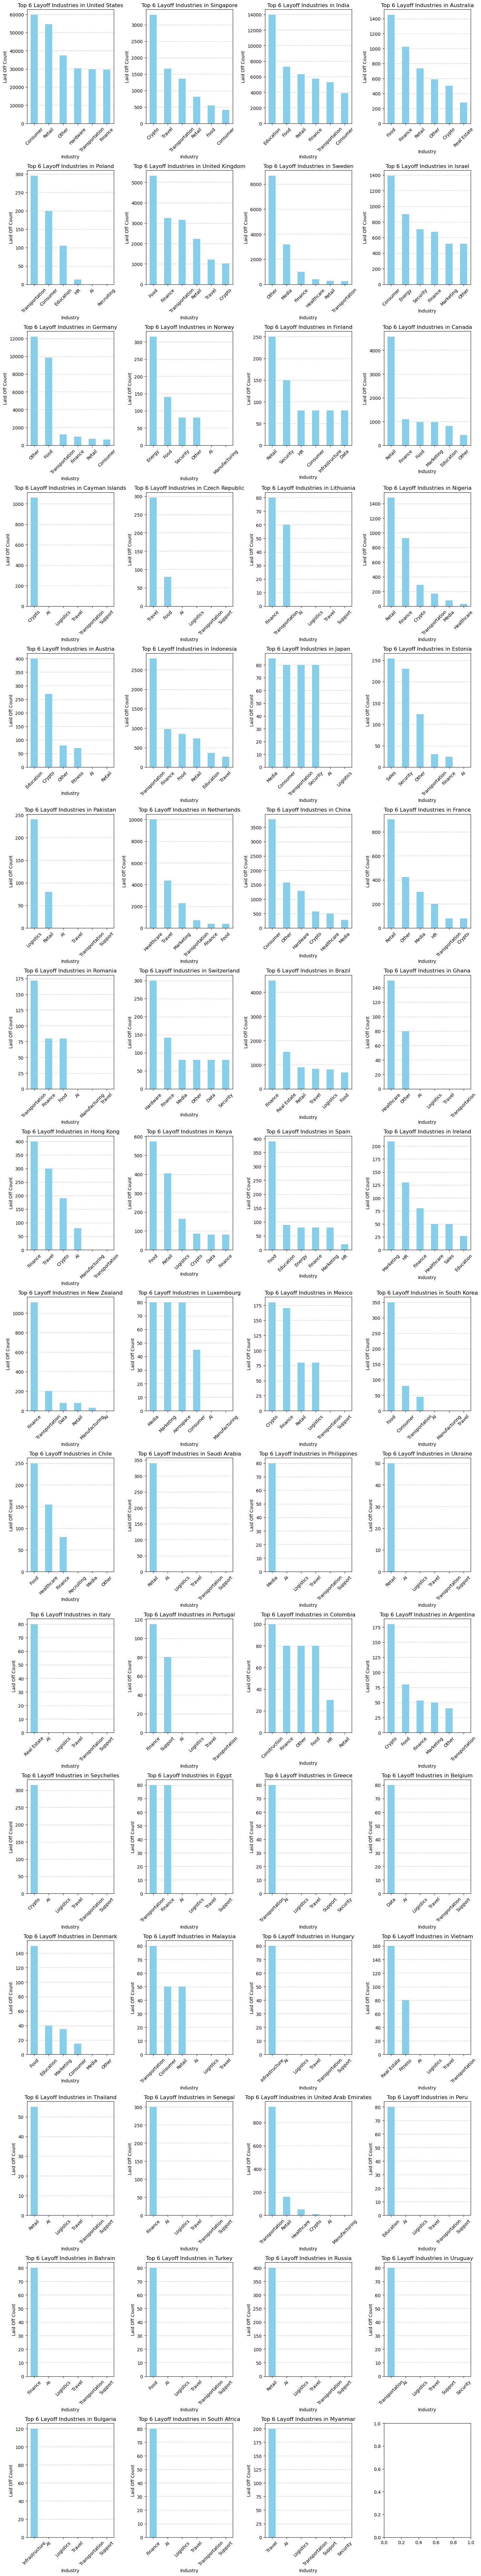

In [30]:
# Get the list of unique countries in the dataset
unique_countries = df_cleaned['Country'].unique()

# Set the number of top industries to consider
top_n = 6

# Calculate the number of rows and columns for subplots
num_countries = len(unique_countries)
num_cols = 4  # Adjust the number of columns as desired
num_rows = (num_countries - 1) // num_cols + 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Loop through each country and plot bar graphs
for i, country in enumerate(unique_countries):
    # Filter the data for the current country
    country_data = df_cleaned[df_cleaned['Country'] == country]
    
    # Grouping by Industry and calculating the total layoffs in each industry for the current country
    industry_layoffs = country_data.groupby('Industry')['Laid_Off_Count'].sum().sort_values(ascending=False)
    
    # Get the top N industries for the current country
    top_industries = industry_layoffs.head(top_n)
    
    # Plotting the bar graph on the corresponding subplot
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]
    top_industries.plot(kind='bar', ax=ax, color='skyblue')
    ax.set_title(f"Top {top_n} Layoff Industries in {country}")
    ax.set_xlabel("Industry")
    ax.set_ylabel("Laid Off Count")
    ax.tick_params(axis='x', rotation=45)
    ax.tick_params(axis='y', labelleft=True)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_axisbelow(True)

plt.tight_layout()
plt.show() 

From the graphs, we can observe that layoffs impacted different industries across various countries. In the United States, the Consumer and Retail sectors experienced the most significant job losses. Singapore saw the highest number of layoffs in the Crypto and Travel industries, while India witnessed a surge in layoffs within the Education and Food sectors. Similarly, Australia's Food and Finance industries were the most affected.

## 3. Which Industries Experienced Layoffs in the Year 2020, and How Did This Vary Across Different Countries?

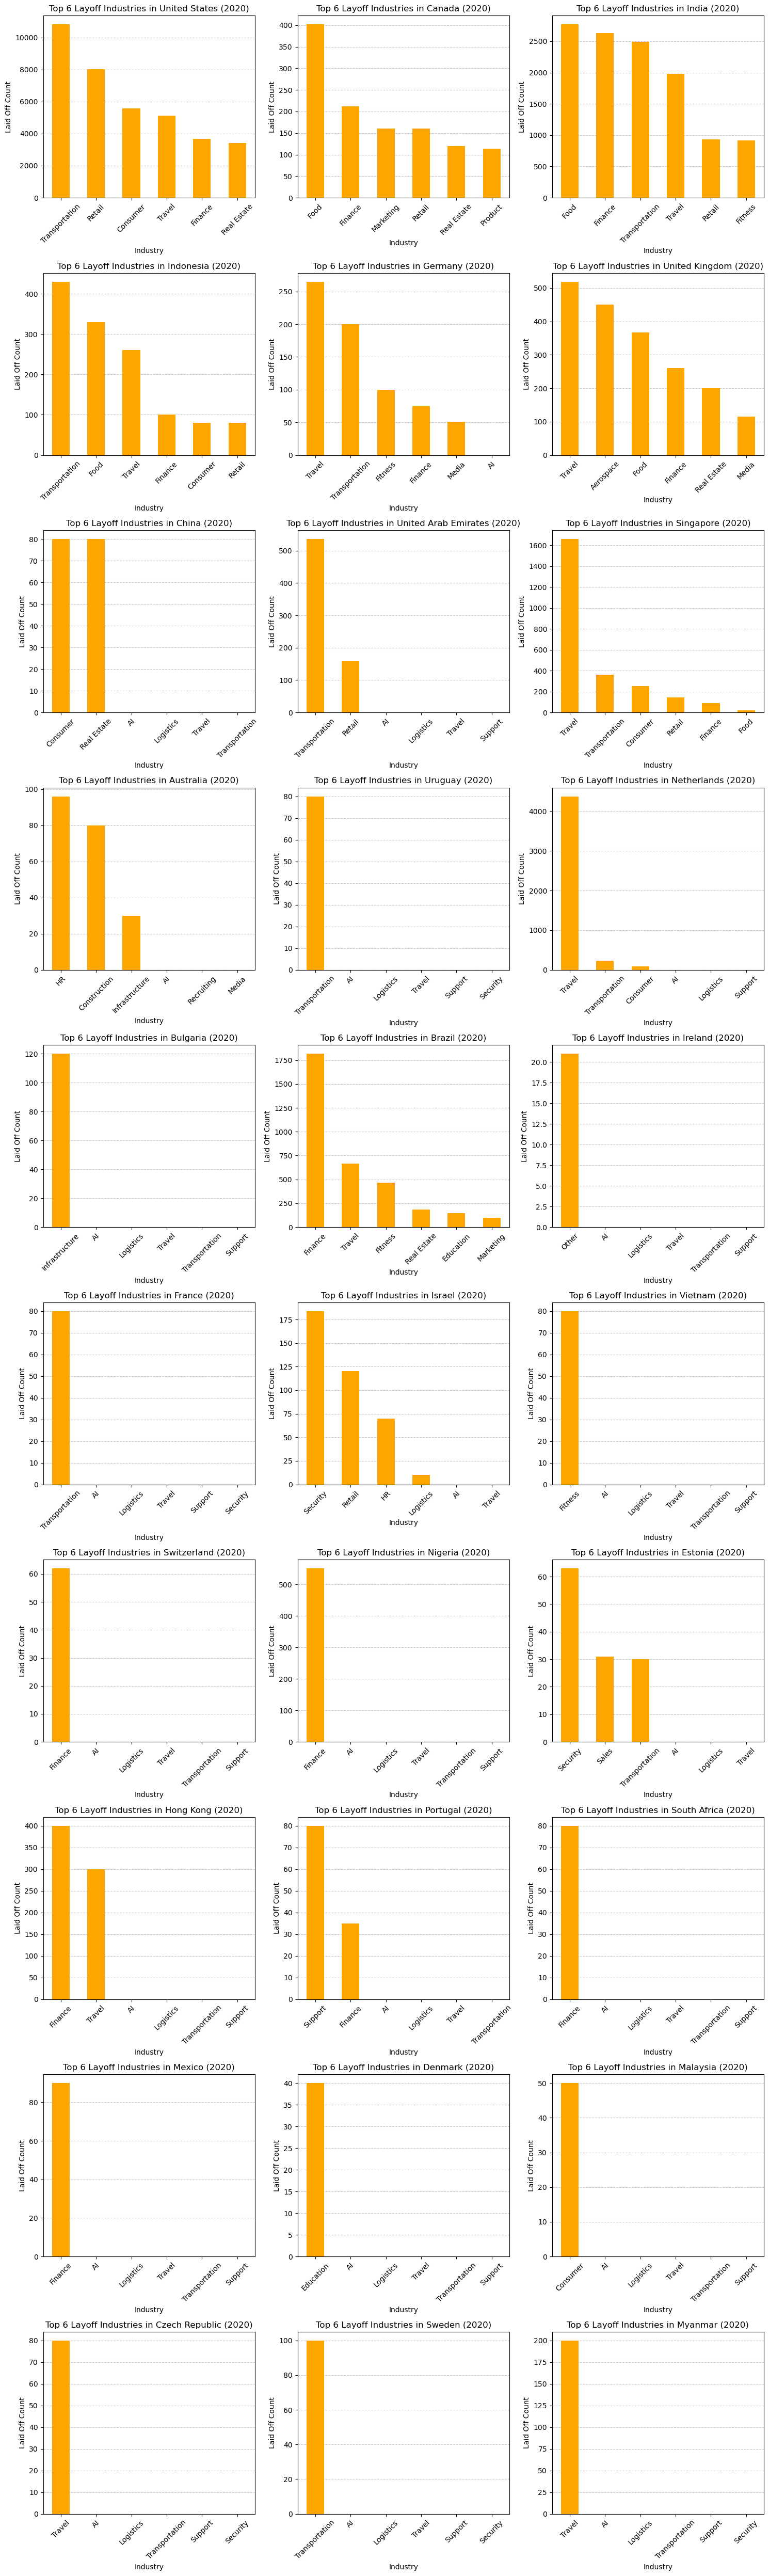

In [31]:
# Filter data for layoffs in 2020 based on the 'Year' column
df_2020 = df_cleaned[df_cleaned['Year'] == 2020]

# Get the list of unique countries in the dataset for 2020
unique_countries_2020 = df_2020['Country'].unique()

# Set the number of top industries to consider
top_n = 6

# Calculate the number of rows and columns for subplots
num_countries_2020 = len(unique_countries_2020)
num_cols = 3  # Adjust the number of columns as desired
num_rows = (num_countries_2020 - 1) // num_cols + 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Loop through each country in 2020 and plot bar graphs
for i, country in enumerate(unique_countries_2020):
    # Filter the data for layoffs in the current country in 2020
    country_data_2020 = df_2020[df_2020['Country'] == country]
    
    # Grouping by Industry and calculating the total layoffs in each industry for the current country in 2020
    industry_layoffs_2020 = country_data_2020.groupby('Industry')['Laid_Off_Count'].sum().sort_values(ascending=False)
    
    # Get the top N industries for the current country in 2020
    top_industries_2020 = industry_layoffs_2020.head(top_n)
    
    # Plotting the bar graph on the corresponding subplot
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]
    top_industries_2020.plot(kind='bar', ax=ax, color='orange')
    ax.set_title(f"Top {top_n} Layoff Industries in {country} (2020)")
    ax.set_xlabel("Industry")
    ax.set_ylabel("Laid Off Count")
    ax.tick_params(axis='x', rotation=45)
    ax.tick_params(axis='y', labelleft=True)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_axisbelow(True)

plt.tight_layout()
plt.show()


Year 2020 (Covid Pandemic): In the United States, the Transportation and Retail industries were hit hardest by layoffs. Similarly, the Food and Finance sectors experienced significant job losses in both India and Canada.

## 4.Which Industries Experienced the Highest Number of Layoffs in the Years 2020, 2021, 2023, and 2024 Across the Countries of the United States, India, Germany, and the United Kingdom?

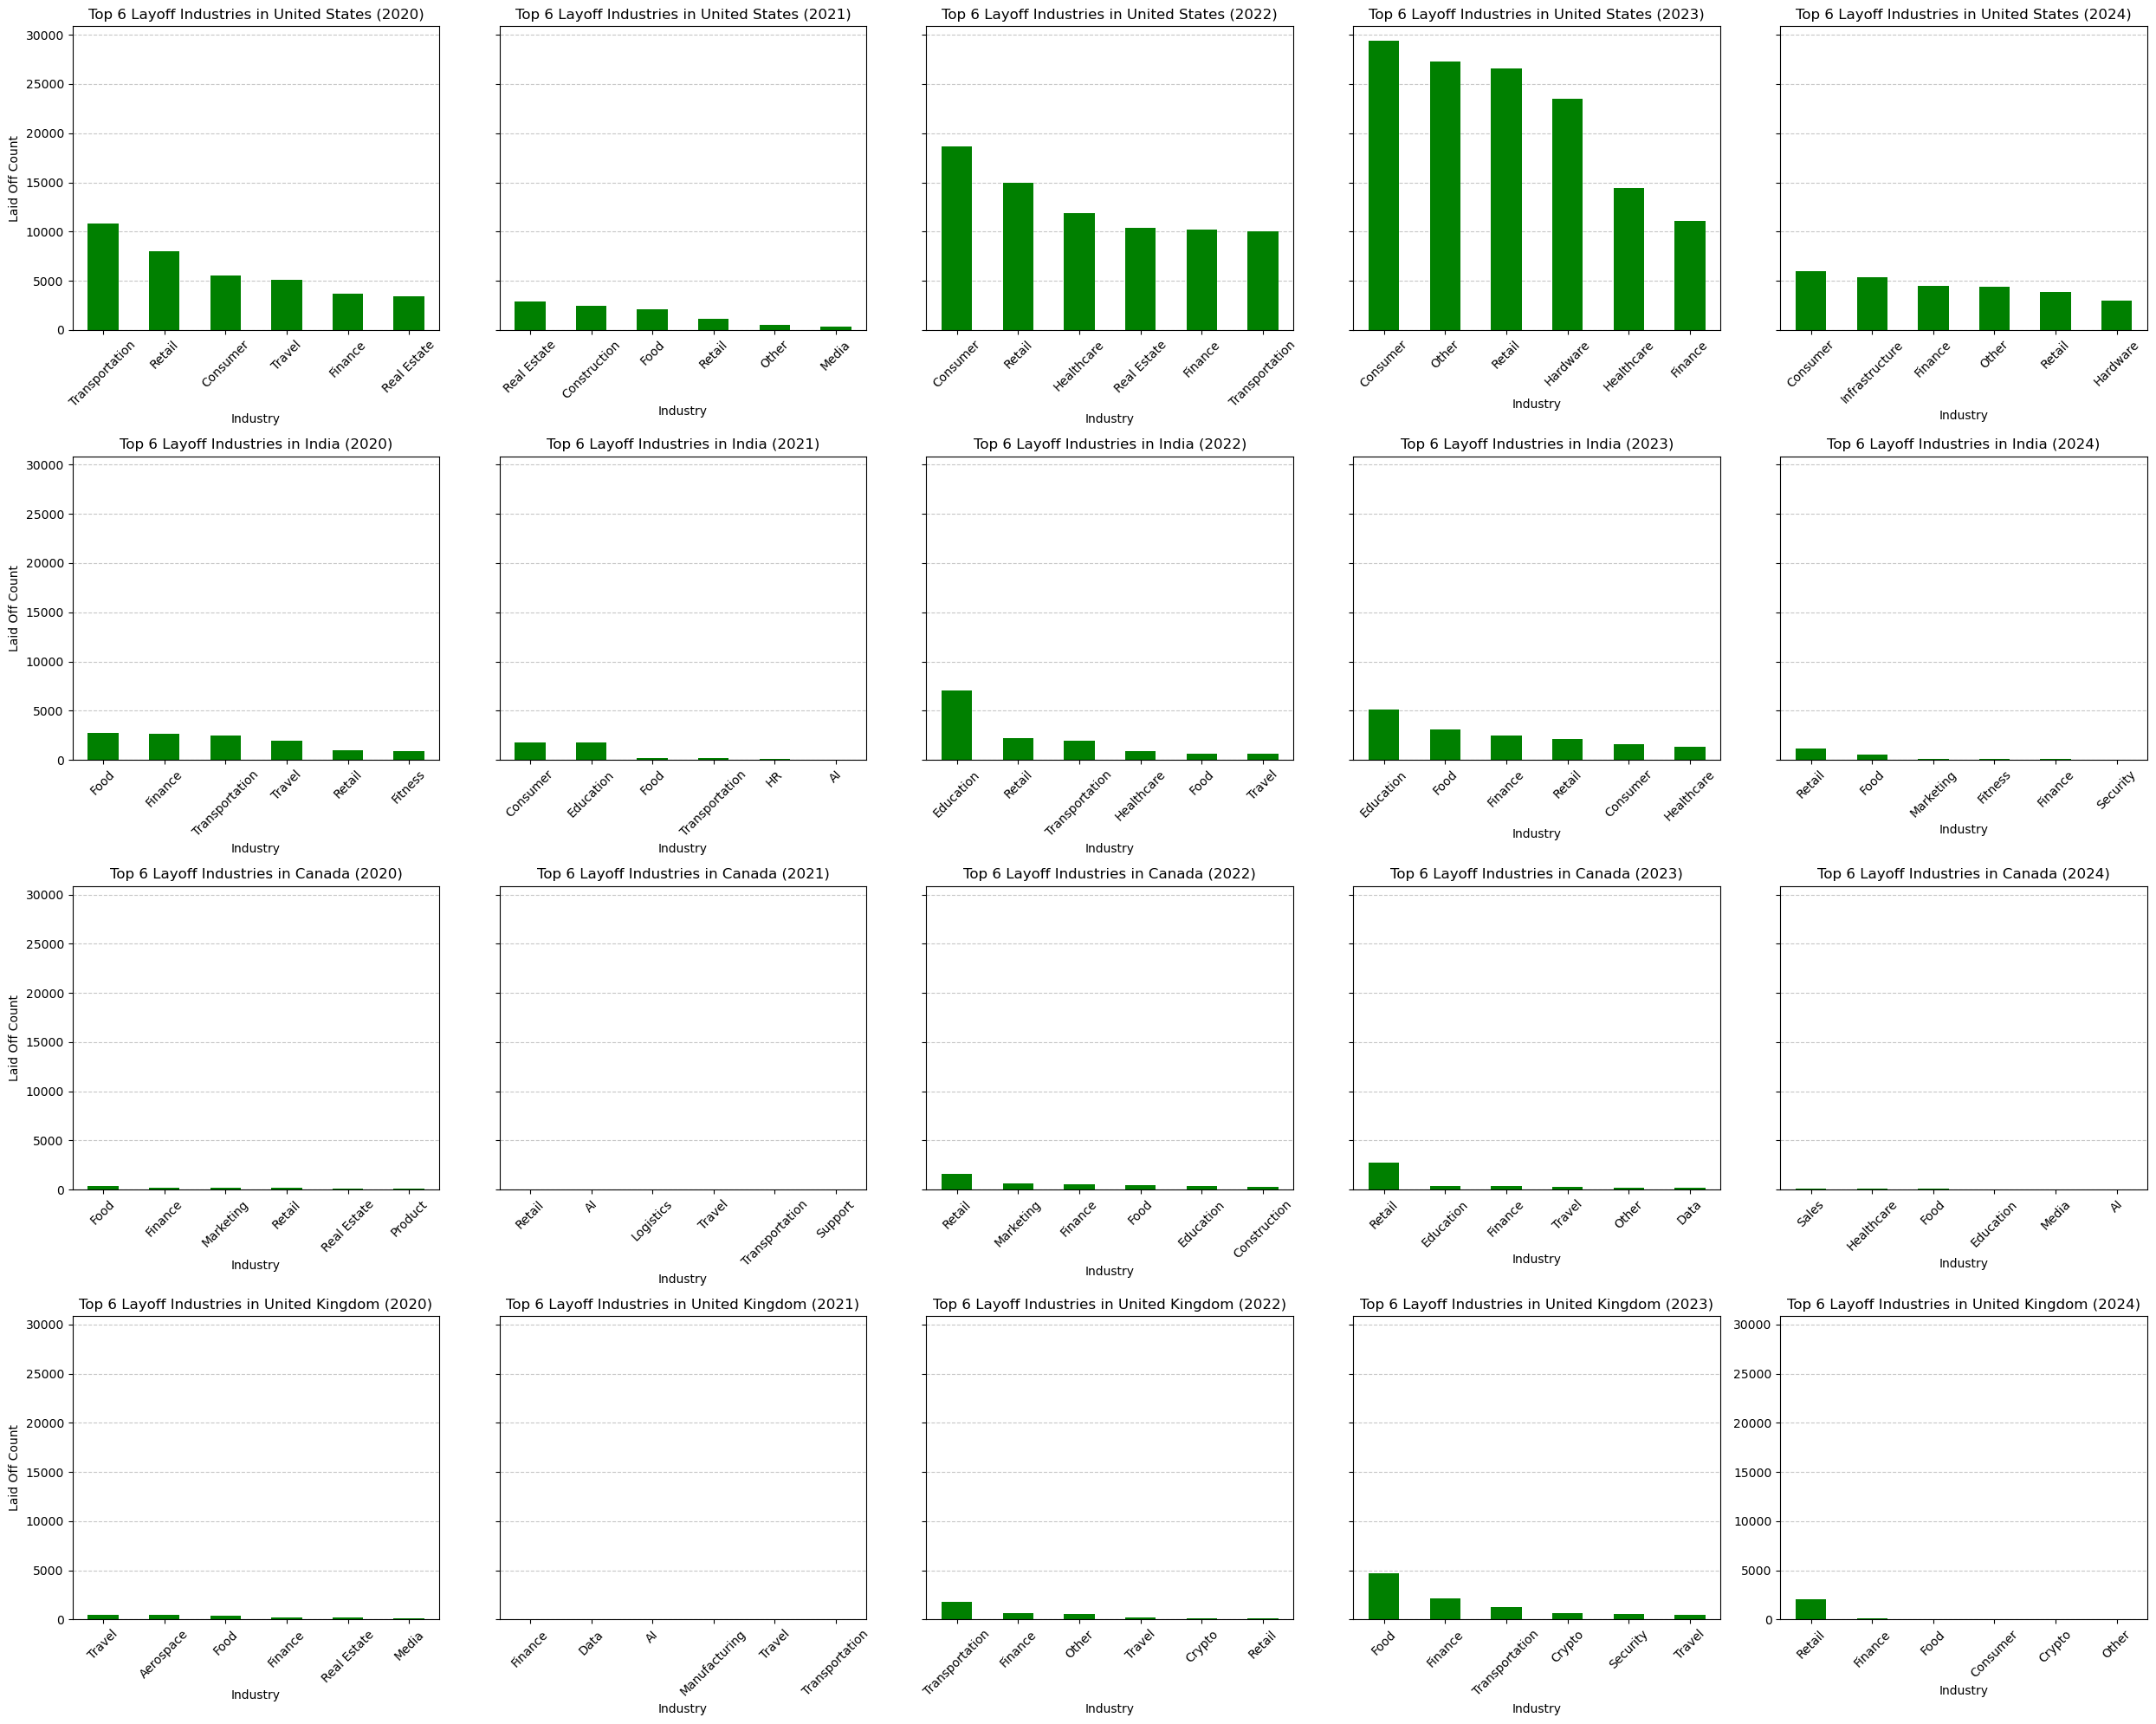

In [32]:
# Define the years and countries of interest
years = [2020, 2021, 2022, 2023, 2024]
countries = ['United States', 'India', 'Canada', 'United Kingdom']

# Set the number of top industries to consider
top_n = 6

# Create subplots
fig, axes = plt.subplots(len(countries), len(years), figsize=(5 * len(years), 5 * len(countries)), sharey=True)

for i, country in enumerate(countries):
    for j, year in enumerate(years):
        # Filter data for the current country and year
        country_year_data = df_cleaned[(df_cleaned['Country'] == country) & (df_cleaned['Year'] == year)]
        
        # Grouping by Industry and calculating the total layoffs in each industry for the current country and year
        industry_layoffs = country_year_data.groupby('Industry')['Laid_Off_Count'].sum().sort_values(ascending=False)
        
        # Get the top N industries for the current country and year
        top_industries = industry_layoffs.head(top_n)
        
        # Plotting the bar graph on the corresponding subplot
        ax = axes[i, j]
        top_industries.plot(kind='bar', ax=ax, color='green')
        ax.set_title(f"Top {top_n} Layoff Industries in {country} ({year})")
        ax.set_xlabel("Industry")
        ax.set_ylabel("Laid Off Count")
        ax.tick_params(axis='x', rotation=45)
        ax.tick_params(axis='y', labelleft=True)
        ax.grid(axis='y', linestyle='--', alpha=0.7)
        ax.set_axisbelow(True)

# Adjust layout
plt.tight_layout()
plt.show()


We can observe that in USA, the Transportation industry saw the most layoffs in 2020, followed by Real Estate in 2021. However, since 2022, the Consumer industry has consistently experienced the highest number of job cuts.

 ## 5. Is there a correlation between the stage of company development and the likelihood of layoffs?

In [33]:
# Get unique stages in the dataset
unique_stages = df_cleaned['Stage'].unique()

# Print unique stages
print("Unique Stages in the Dataset:")
for stage in unique_stages:
    print(stage)


Unique Stages in the Dataset:
Post-IPO
Series C
Unknown
Subsidiary
Series D
Series A
Acquired
Series B
Seed
Series F
Series E
Private Equity
Series H
Series G
Series I
Series J


In [34]:
# Create dummy variables for the 'Stage' column
dummy_stages = pd.get_dummies(df_cleaned['Stage'], prefix='Stage')

# Concatenate the dummy variables with the original DataFrame
df_with_dummies = pd.concat([df_cleaned, dummy_stages], axis=1)

# Calculate correlation coefficients between each dummy variable and 'Laid_Off_Count'
correlation_coefficients = {}
for column in dummy_stages.columns:
    correlation_coefficient = np.corrcoef(df_with_dummies[column], df_with_dummies['Laid_Off_Count'])[0, 1]
    correlation_coefficients[column] = correlation_coefficient

# Display correlation coefficients
print("Correlation Coefficients between Dummy Variables for Stage and Laid_Off_Count:")
for stage, coefficient in correlation_coefficients.items():
    print(f"{stage}: {coefficient}")


Correlation Coefficients between Dummy Variables for Stage and Laid_Off_Count:
Stage_Acquired: 0.013282807342570842
Stage_Post-IPO: 0.21014384230358812
Stage_Private Equity: 0.0025134650553297858
Stage_Seed: -0.035834618594782965
Stage_Series A: -0.05384164771309559
Stage_Series B: -0.053550333856054746
Stage_Series C: -0.05790087305004493
Stage_Series D: -0.04434230134963762
Stage_Series E: -0.02107750636349165
Stage_Series F: -0.010469227429428516
Stage_Series G: 0.004183704665194123
Stage_Series H: 0.010280304454688811
Stage_Series I: 0.013138934597589042
Stage_Series J: 0.01986446751284555
Stage_Subsidiary: 0.0006468454077515878
Stage_Unknown: -0.04775453478830746


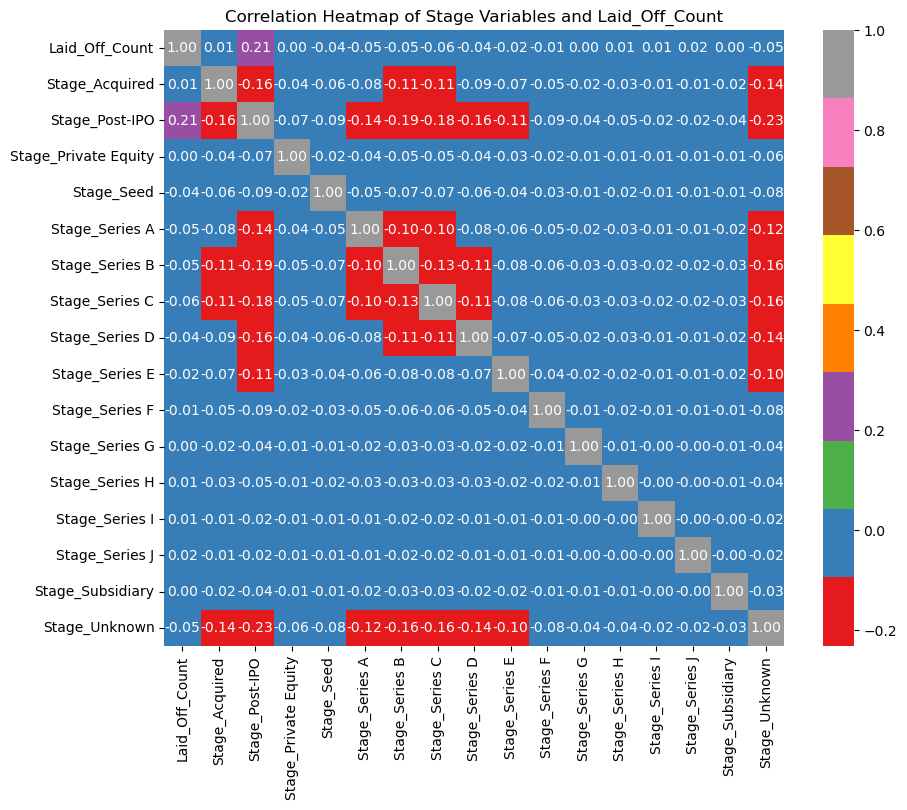

In [35]:
# Calculate the correlation matrix
correlation_matrix = df_with_dummies[['Laid_Off_Count'] + list(dummy_stages.columns)].corr()

# Set up the figure
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='Set1', fmt=".2f", annot_kws={"size": 10})

# Add title
plt.title('Correlation Heatmap of Stage Variables and Laid_Off_Count')

# Show plot
plt.show()


## 6.How does the layoff trend vary over different time periods?

### 6a)Which quarter had the highest and lowest number of layoffs?

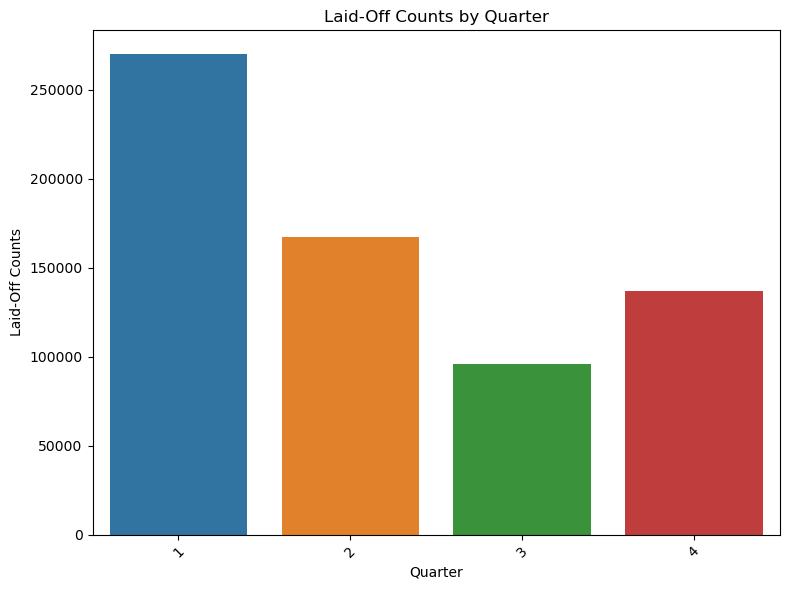

In [32]:
# Group by quarter and sum up laid-off counts
quarterly_layoffs = df_cleaned.groupby('Quarter')['Laid_Off_Count'].sum().reset_index()

# Plotting bar graph
plt.figure(figsize=(8, 6))  
sns.barplot(x='Quarter', y='Laid_Off_Count', data=quarterly_layoffs)
plt.xlabel('Quarter')
plt.ylabel('Laid-Off Counts')
plt.title('Laid-Off Counts by Quarter')
plt.xticks(rotation=45) 
plt.tight_layout()  
plt.show()

Looking at the data from 2020 to 2024: The majority of layoffs appear to be concentrated in the first (Q1) and second (Q2) quarters of each year.

### 6b)Which year had the most layoffs?

In [66]:
#find layoffs for each year
df_cleaned.groupby('Year')['Laid_Off_Count'].sum()

Year
2020     93798
2021     16863
2022    197989
2023    306115
2024     55306
Name: Laid_Off_Count, dtype: int32

2023 saw the most layoffs compared to 2020, 2021, and 2022.

### 6c) What insights can be drawn from analyzing the layoff trend across different years and examining the monthly layoff counts for each year individually?

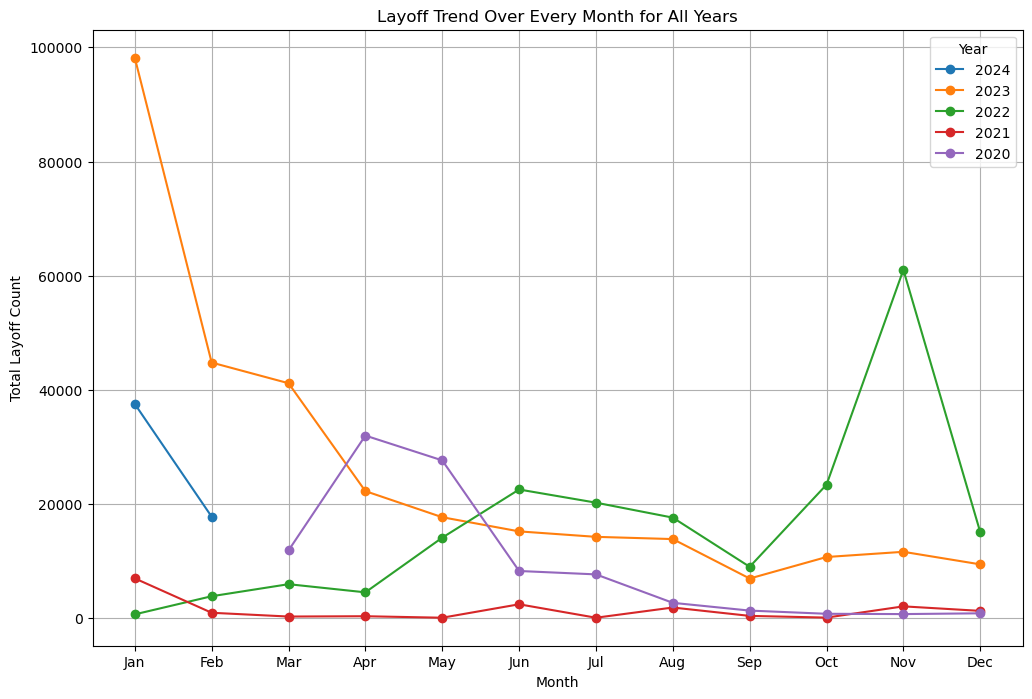

In [67]:
# Group data by year and month and sum the layoff counts for each month across all years
monthly_layoffs_by_year = df_cleaned.groupby(['Year', 'Month'])['Laid_Off_Count'].sum()

# Extract unique years
years = df_cleaned['Year'].unique()

# Plot the data for each year
plt.figure(figsize=(12, 8))
for year in years:
    monthly_layoffs = monthly_layoffs_by_year[year]
    plt.plot(monthly_layoffs.index, monthly_layoffs.values, marker='o', label=str(year))

# Add labels and title
plt.title('Layoff Trend Over Every Month for All Years')
plt.xlabel('Month')
plt.ylabel('Total Layoff Count')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.grid(True)
plt.show()


- The trend of layoffs predominantly began from October 2022 to March 2023.
Two potential reasons for the layoff trend starting majorly from Oct 2022 to Mar 2023 (2022Q4 to 2023Q1) could be:
1. Economic Downturn: The companies may have experienced a downturn in the economy, leading to decreased consumer demand, reduced revenue, and the need to downsize the workforce to cut costs and maintain profitability.

2. Strategic Restructuring: The companies might have undergone strategic restructuring initiatives during this period, such as mergers, acquisitions, or shifts in business priorities, necessitating layoffs to realign resources and streamline operations.

- In 2023, the year began with the highest number of layoffs, which gradually decreased throughout the year. Conversely, in 2022, layoffs started at lower levels but increased over the course of the year.

## 7.What is the distribution of layoffs across different days of the week, and which day experiences the highest occurrence of layoffs?

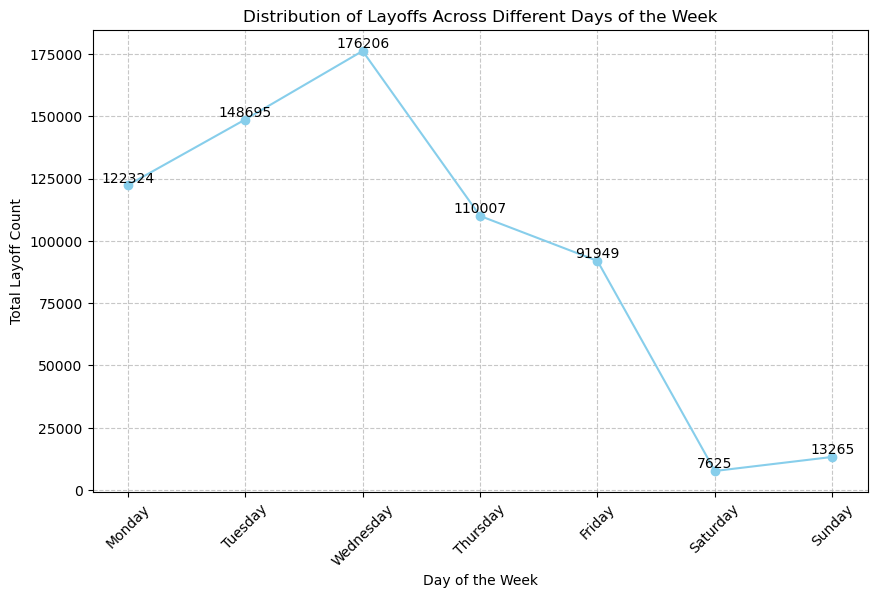

In [65]:
# Combine 'Year', 'Month', and 'Day' columns to create a datetime column
df_cleaned['Date'] = pd.to_datetime(df_cleaned[['Year', 'Month', 'Day']])

# Extract the day of the week (Monday=0, Sunday=6) from the 'Date' column
df_cleaned['Day_of_Week'] = df_cleaned['Date'].dt.dayofweek

# Group by the day of the week and sum the layoff counts
layoffs_by_day = df_cleaned.groupby('Day_of_Week')['Laid_Off_Count'].sum()

day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plot the distribution of layoffs across different days of the week
plt.figure(figsize=(10, 6))
plt.plot(day_names, layoffs_by_day, marker='o', color='skyblue', linestyle='-')
plt.title('Distribution of Layoffs Across Different Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Layoff Count')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

# Annotate each point with the corresponding layoff count
for i, count in enumerate(layoffs_by_day):
    plt.text(day_names[i], count, str(count), ha='center', va='bottom')

plt.show()


Wednesday is the day with the highest occurrence of layoffs in a week.

## 8. Identifying the ten companies with the highest number of layoffs.

In [96]:
#layoff by company
df_cleaned.groupby('Company')['Laid_Off_Count'].sum().nlargest(15)

Company
Amazon        28080
Meta          21080
Google        13355
Microsoft     13218
SAP           11000
Salesforce    10840
Philips       10000
Cisco          8700
Ericsson       8500
Flink          8100
Uber           7785
Micron         7200
Dell           6730
Byju's         5000
Bytedance      4750
Name: Laid_Off_Count, dtype: int32

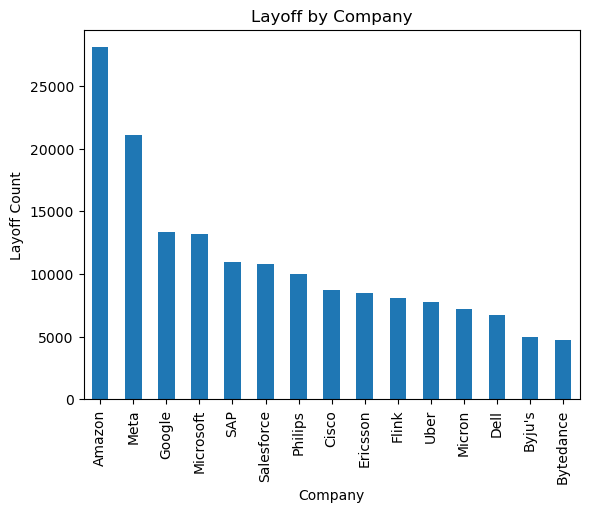

In [97]:
#plotting it with bar chart
df_cleaned.groupby('Company')['Laid_Off_Count'].sum().nlargest(15).plot(kind='bar')
plt.title('Layoff by Company')
plt.xlabel('Company')
plt.ylabel('Layoff Count');

### 8a) Identify the top 5 companies with the highest layoff counts for each year from 2020 to 2024.

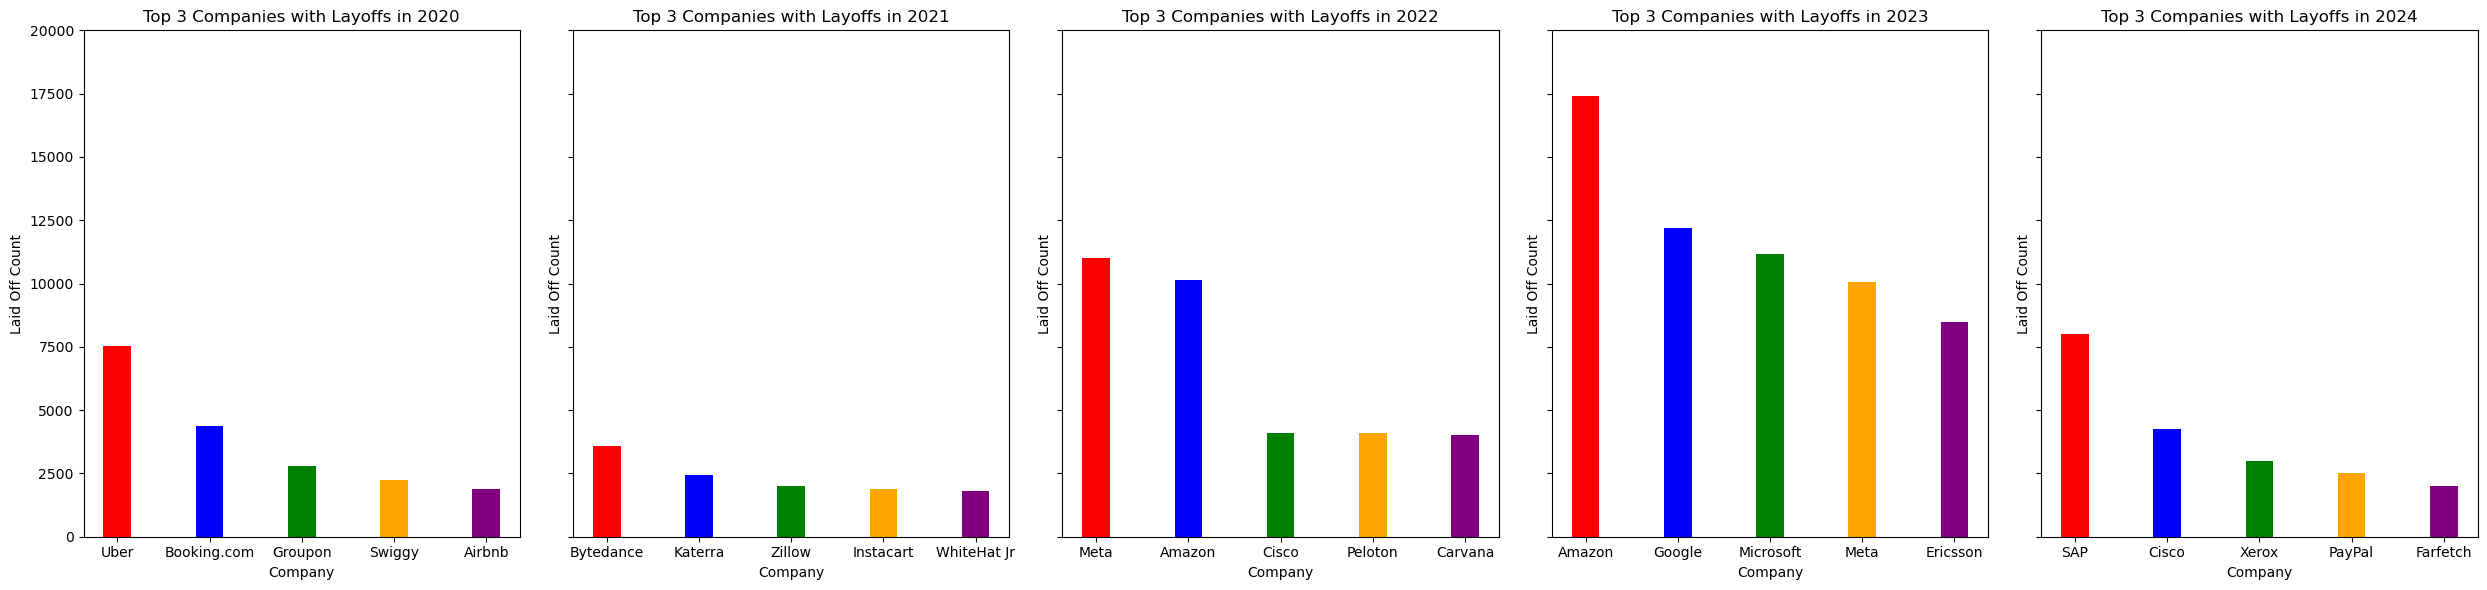

In [103]:
# Define years and top_n
years = [2020, 2021, 2022, 2023, 2024]
top_n = 5

# Create subplots
fig, axes = plt.subplots(1, len(years), figsize=(5*len(years), 6), sharey=True)

# Define colors for the top 5 companies
colors = ['red', 'blue', 'green','orange','purple']

# Initialize y-axis limit
y_max = 20000

for i, year in enumerate(years):
    # Filter data for the current year
    year_data = df_cleaned[df_cleaned['Year'] == year]
    
    # Group data by company and sum the layoff counts for the current year
    layoffs_by_company = year_data.groupby('Company')['Laid_Off_Count'].sum()
    
    # Sort companies based on total layoff counts and select the top N companies
    top_companies = layoffs_by_company.nlargest(top_n)
    
    # Initialize the width for each bar group
    bar_width = 0.3
    
    # Calculate the x positions for the bars
    x = np.arange(len(top_companies))
    
    # Create bars for each company with specified colors
    for j, (company, layoffs) in enumerate(top_companies.items()):
        axes[i].bar(x[j], layoffs, bar_width, label=company, color=colors[j])
    
    # Update y-axis limit if necessary
    y_max = max(y_max, top_companies.max())
    
    # Set the labels and title for each subplot
    axes[i].set_xlabel('Company')
    axes[i].set_title(f'Top 3 Companies with Layoffs in {year}')
    
    # Set the x-axis tick labels for each subplot
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(top_companies.index)

# Set y-axis limit for all subplots
for ax in axes:
    ax.set_ylim(0, y_max)
    ax.set_ylabel('Laid Off Count')

plt.tight_layout()
plt.show()


2020:
- Uber had the highest layoffs among the top 3 companies, likely due to the impact of the COVID-19 pandemic on the ride-sharing industry and the need to cut costs.
- Booking.com, an online travel company, was also heavily affected by the pandemic's toll on the travel sector, leading to significant workforce reductions.

2021:
- ByteDance, the parent company of TikTok,might possibly be reflecting restructuring efforts or strategic shifts within the company.
- Kanzhun (Company), a Chinese online recruitment platform, also had major layoffs, potentially due to changes in the job market or industry dynamics.

2022:
- Meta (Facebook) had the highest layoffs, likely driven by its strategic pivot towards the metaverse and efforts to streamline operations amid competition and market changes.
- Amazon(As an e-commerce and cloud computing giant), may be undergoing workforce optimization and cost-cutting measures to maintain profitability and competitiveness, especially in the face of changing consumer behavior and market conditions.

2023:
- Amazon again tops the list, may be indicating sustained efforts to optimize its workforce or market conditions.
- Google - Google's layoffs could be driven by a need to streamline operations, realign its workforce with strategic priorities (such as AI and cloud computing), and adapt to evolving technological landscapes and competitive pressures.
- Microsoft - Similar to Google, Microsoft's layoffs may be aimed at restructuring the company's workforce to align with strategic shifts, such as a greater focus on cloud services, artificial intelligence, and emerging technologies.

2024 (projected):
- SAP - SAP's projected layoffs could be related to consolidating its product offerings, adapting to changing customer demands, or responding to competition from cloud-based solutions and other disruptive technologies.
- Cisco - Cisco's potential layoffs may stem from the need to restructure its business model and workforce in the face of evolving networking technologies, cloud computing trends, and shifts in the telecommunications and networking hardware industries.

## 9. Identifying Top 15 Location_HQ with highest layoffs?

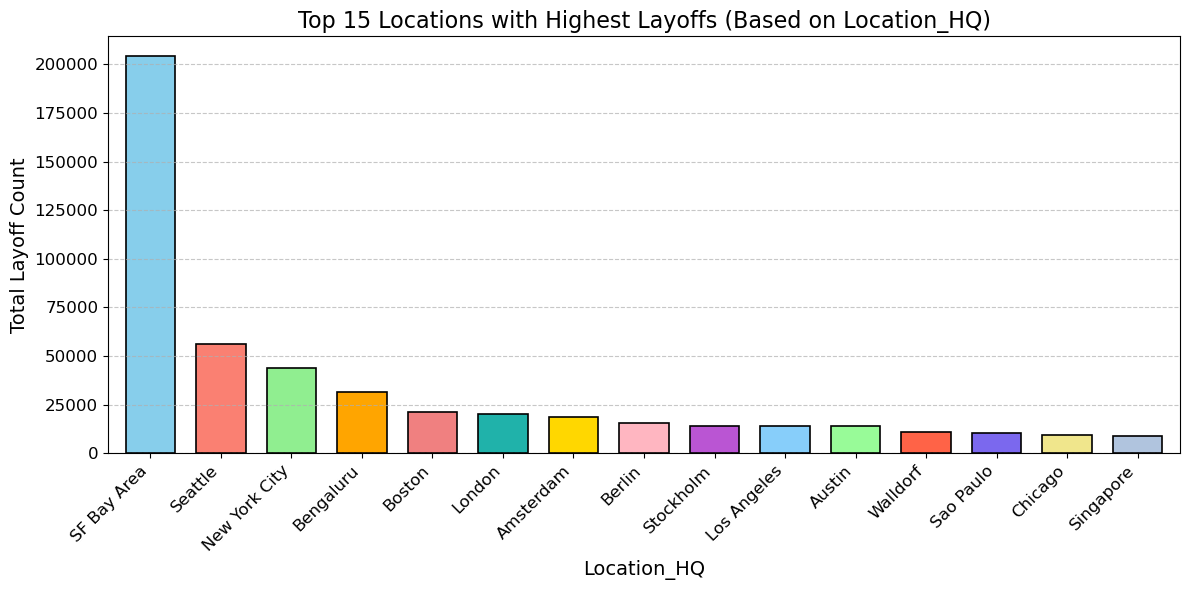

In [110]:
# Define custom colors
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'lightcoral', 'lightseagreen',
          'gold', 'lightpink', 'mediumorchid', 'lightskyblue', 'palegreen', 'tomato',
          'mediumslateblue', 'khaki', 'lightsteelblue']

# Group data by Location_HQ and sum the layoff counts
top_locations_HQ = df_cleaned.groupby('Location_HQ')['Laid_Off_Count'].sum().nlargest(15)

# Create a bar plot with custom colors and additional customizations
plt.figure(figsize=(12, 6))
top_locations_HQ.plot(kind='bar', color=colors, width=0.7, edgecolor='black', linewidth=1.2)
plt.title('Top 15 Locations with Highest Layoffs (Based on Location_HQ)', fontsize=16)
plt.xlabel('Location_HQ', fontsize=14)
plt.ylabel('Total Layoff Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## 10.How does the company's stage of development (e.g., early-stage, growth-stage) relate to the layoff count?

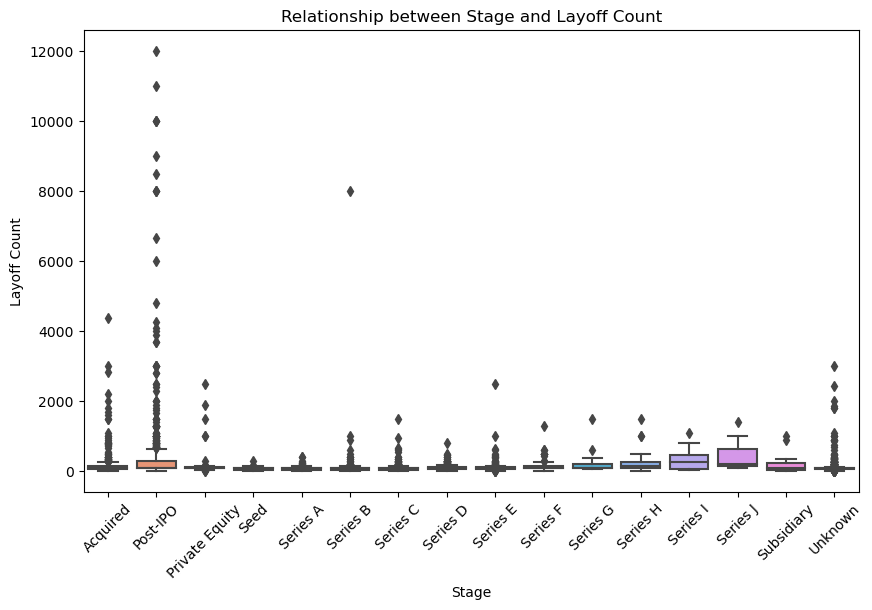

In [112]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Stage', y='Laid_Off_Count', data=df_cleaned)
plt.title('Relationship between Stage and Layoff Count')
plt.xlabel('Stage')
plt.ylabel('Layoff Count')
plt.xticks(rotation=45)
plt.show()

## 11.Is there a correlation between the percentage of layoffs and the amount of funds raised by the company?

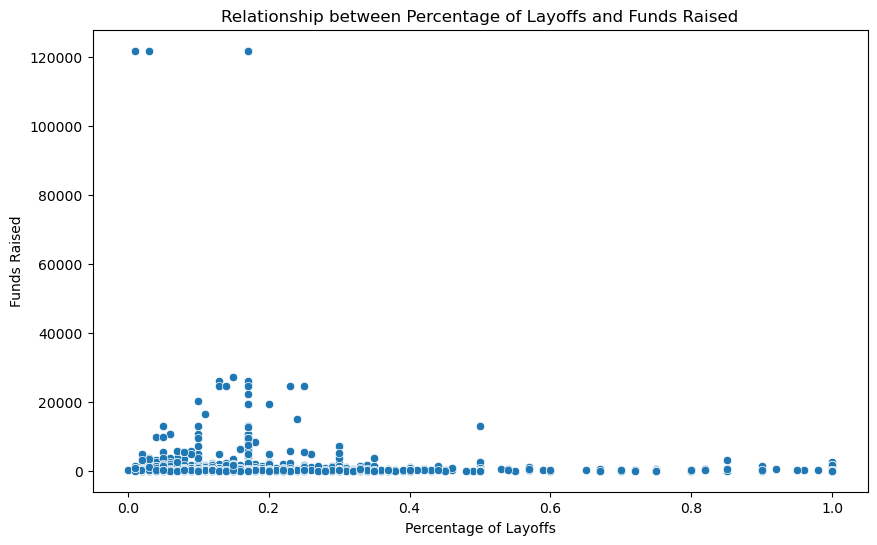

In [113]:
# Visualize the relationship between percentage and funds raised
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Percentage', y='Funds_Raised', data=df_cleaned)
plt.title('Relationship between Percentage of Layoffs and Funds Raised')
plt.xlabel('Percentage of Layoffs')
plt.ylabel('Funds Raised')
plt.show()

### 11a)Funds raised vs Number of Layoffs

In [36]:
# Scatter plot for funds raised vs number of layoffs
fig2 = px.scatter(df_cleaned, 
                  x='Laid_Off_Count', 
                  y='Funds_Raised', 
                  title='Funds Raised vs. Number of Layoffs', 
                  labels={'Laid_Off_Count': 'Number of Layoffs', 'Funds_Raised': 'Funds Raised ($)'},
                  color='Laid_Off_Count',
                  color_continuous_scale=px.colors.sequential.RdBu,
                  hover_name='Company')

fig2.show()

## 12.Are there any outliers in the Layoff Count?

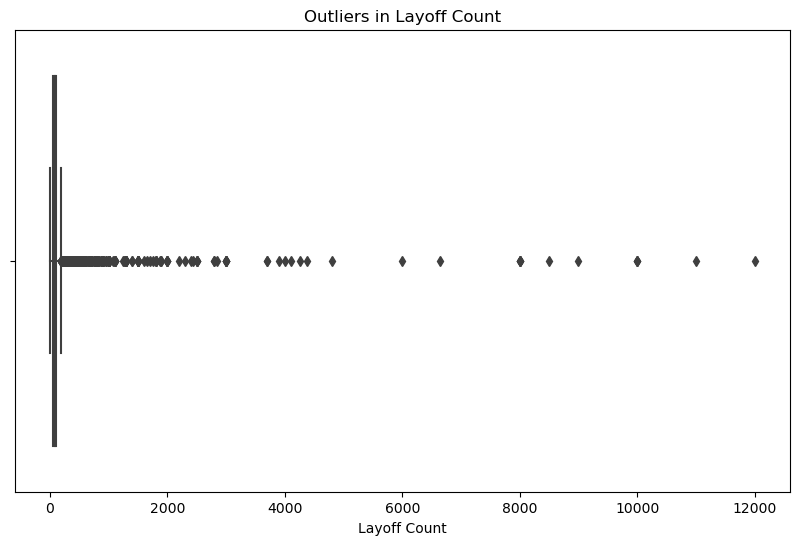

In [114]:
# Detect and visualize outliers in layoff count
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned['Laid_Off_Count'])
plt.title('Outliers in Layoff Count')
plt.xlabel('Layoff Count')
plt.show()

## 13. How do different stages of company development compare in terms of layoff counts, percentage of layoffs, and funds raised?

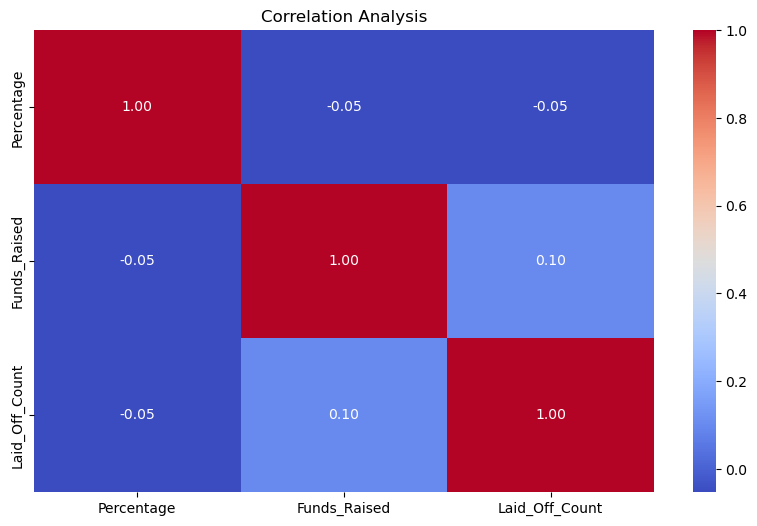

In [116]:
# Conduct correlation analysis
correlation_matrix = df_cleaned[['Percentage', 'Funds_Raised', 'Laid_Off_Count']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Analysis')
plt.show()

## 14.Which country had the highest layoffs?

In [37]:
#layoff for each country
df_cleaned.groupby('Country')['Laid_Off_Count'].sum().sort_values(ascending=False)

Country
United States     448601
India              53489
Germany            28373
United Kingdom     20609
Netherlands        18995
                   ...  
Hungary               80
Italy                 80
Philippines           80
Thailand              55
Ukraine               50
Name: Laid_Off_Count, Length: 63, dtype: int32

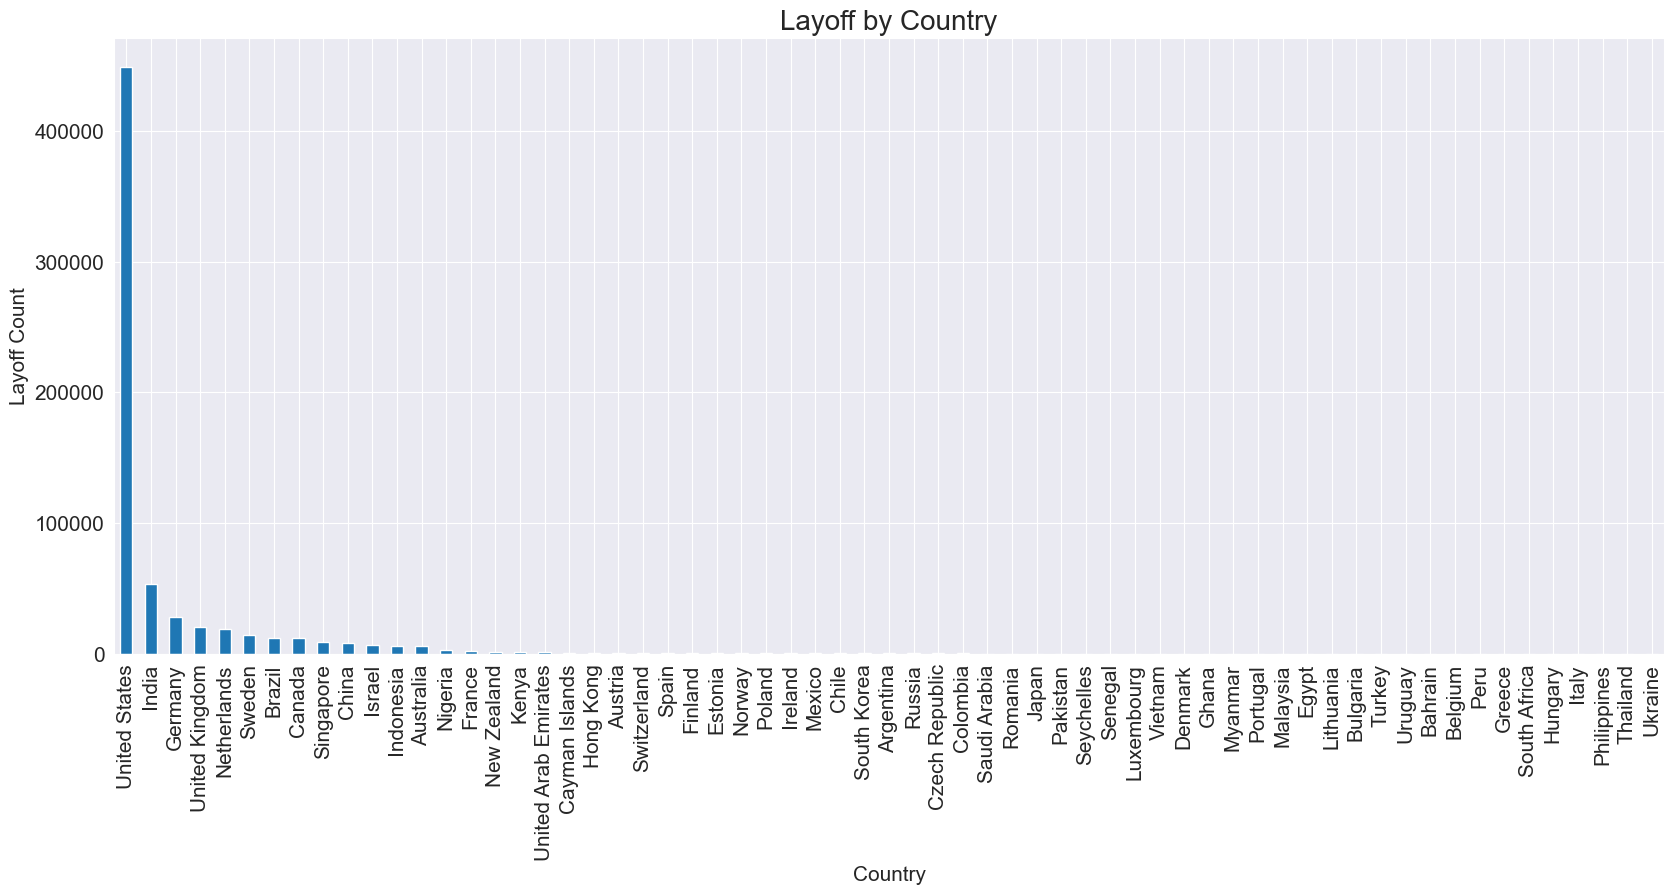

In [38]:
#plotting it with bar chart
df_cleaned.groupby('Country')['Laid_Off_Count'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(20,8),fontsize=15)
plt.title('Layoff by Country',size=20)
plt.xlabel('Country',size=15)
plt.ylabel('Layoff Count',size=15);


## 15. Let's do more analysis on 'United States' country

In [111]:
# Filtering the dataset for entries related to United States
US_df = df_cleaned[df_cleaned['Country'] == 'United States']

# Displaying the first few rows of the US-specific data
US_df.head()

Company  Location_HQ        Industry  Percentage  Funds_Raised  \
0           Fisker  Los Angeles  Transportation        0.15        1700.0   
1  Electronic Arts  SF Bay Area        Consumer        0.05           2.0   
2           Vacasa     Portland          Travel        0.05         834.0   
3   Treasury Prime  SF Bay Area         Finance        0.40          71.0   
4         Motional       Boston  Transportation        0.05         165.0   

      Stage        Country  Laid_Off_Count  Year  Month  Day  Quarter  
0  Post-IPO  United States              80  2024      2   29        1  
1  Post-IPO  United States             670  2024      2   28        1  
2  Post-IPO  United States             320  2024      2   28        1  
3  Series C  United States              40  2024      2   28        1  
4   Unknown  United States              80  2024      2   28        1

In [112]:
US_df.columns

Index(['Company', 'Location_HQ', 'Industry', 'Percentage', 'Funds_Raised',
       'Stage', 'Country', 'Laid_Off_Count', 'Year', 'Month', 'Day',
       'Quarter'],
      dtype='object')

In [113]:
# Number of unique companies in United States that had layoffs
num_companies = US_df['Company'].nunique()
print("Total number of companies in United States:",num_companies)

# Total layoffs in United States
total_layoffs = US_df['Laid_Off_Count'].sum()
print("Total count of Layoffs in US:",total_layoffs)

#Layoffs in each year 
# Determine unique years
unique_years = US_df['Year'].unique()

# iterate over each unique year
for year in unique_years:
# Filter dataset for each year
    year_data = US_df[US_df['Year'] == year]
    
    # Calculate total layoffs for the year
    total_layoffs_year = year_data['Laid_Off_Count'].sum()
    print(f"Total layoffs in {year}: {total_layoffs_year}")


# Average funds raised by companies in United States
avg_funds_raised = US_df['Funds_Raised'].mean()
print("Average funds raised by companies in United States:",avg_funds_raised)

# Total funds raised by companies in United States
total_funds_raised = US_df['Funds_Raised'].sum()
print("Total funds raised by companies in United States:", total_funds_raised)

Total number of companies in United States: 1594
Total count of Layoffs in US: 448601
Total layoffs in 2024: 38215
Total layoffs in 2023: 208476
Total layoffs in 2022: 131335
Total layoffs in 2021: 10430
Total layoffs in 2020: 60145
Average funds raised by companies in United States: 766.2310619469026
Total funds raised by companies in United States: 1731682.2


## How do layoffs in the United States vary between different sectors or sub-industries?

In [114]:
# Top industries in United States affected by layoffs
top_industries = US_df.groupby('Industry')['Laid_Off_Count'].sum().sort_values(ascending=False)

top_industries.head(10)

Industry
Consumer          59727
Retail            54527
Other             37464
Hardware          30254
Transportation    29775
Finance           29627
Healthcare        28617
Real Estate       20301
Food              17031
Infrastructure    16551
Name: Laid_Off_Count, dtype: int32

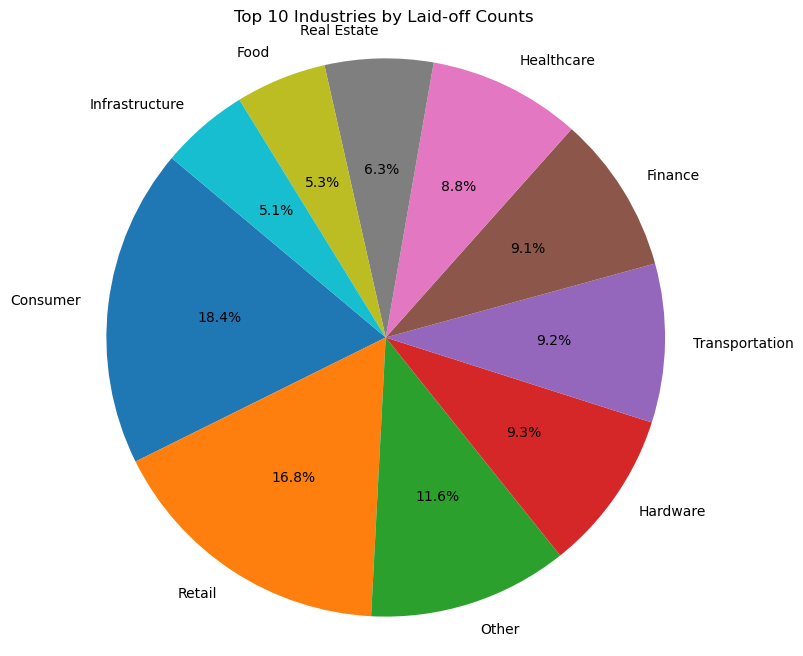

In [115]:
# Selecting top 10 industries
top_industries = top_industries.head(10)

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_industries, labels=top_industries.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Industries by Laid-off Counts')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [116]:
#Top 10 companies in United States that laid off 
top_companies = US_df.groupby('Company')["Laid_Off_Count"].sum().sort_values(ascending=False)
top_companies.head(20)

Company
Amazon        28080
Meta          21080
Google        13355
Microsoft     13218
Salesforce    10790
Cisco          8700
Micron         7200
Uber           6900
Dell           6730
PayPal         4583
Wayfair        4270
Better.com     4220
Peloton        4095
Carvana        4080
Twitter        4020
IBM            3980
Groupon        3800
Seagate        3480
Unity          3199
Cerner         3080
Name: Laid_Off_Count, dtype: int32

## Are there any differences in the characteristics of layoffs (e.g., size, frequency) between startups and established companies in the United States?

In [117]:
# Distribution of layoffs across different stages of companies in United States
company_stages_distribution = US_df.groupby('Stage')['Laid_Off_Count'].sum().sort_values(ascending=False)

company_stages_distribution

Stage
Post-IPO          266412
Acquired           41156
Unknown            34761
Series C           20533
Series D           18736
Series B           18315
Series E           13642
Series F            9760
Series A            7343
Series H            5671
Private Equity      5139
Seed                2919
Subsidiary          1979
Series G            1960
Series I             275
Series J               0
Name: Laid_Off_Count, dtype: int32

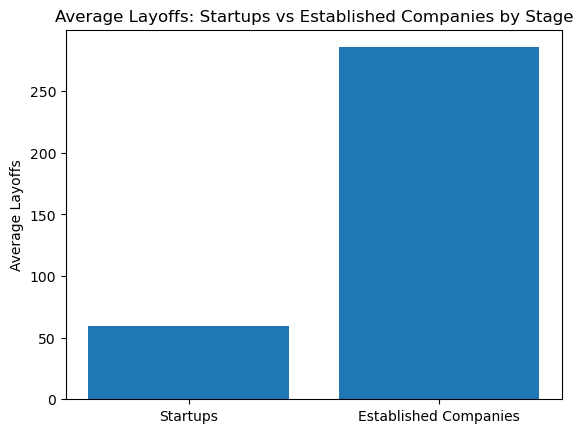

In [118]:
# Define criteria based on the provided stages to differentiate between startups and established companies
# consider companies in "Seed" or "Series A" stage as startups
# and companies in "Series D" or beyond as established

startup_criteria = (US_df['Stage'] == 'Seed') | (US_df['Stage'] == 'Series A')
startup_df = US_df[startup_criteria]

established_criteria = (US_df['Stage'] == 'Series D') | (US_df['Stage'] == 'Series E') | \
                       (US_df['Stage'] == 'Series F') | (US_df['Stage'] == 'Series G') | \
                       (US_df['Stage'] == 'Series H') | (US_df['Stage'] == 'Series I') | \
                       (US_df['Stage'] == 'Series J') | (US_df['Stage'] == 'Post-IPO') | \
                       (US_df['Stage'] == 'Acquired') | (US_df['Stage'] == 'Private Equity')
established_df = US_df[established_criteria]

# Calculate average or median size of layoffs for startups and established companies
startup_avg_layoffs = startup_df['Laid_Off_Count'].mean()
established_avg_layoffs = established_df['Laid_Off_Count'].mean()

# Plotting
plt.bar(['Startups', 'Established Companies'], [startup_avg_layoffs, established_avg_layoffs])
plt.title('Average Layoffs: Startups vs Established Companies by Stage')
plt.ylabel('Average Layoffs')
plt.show()


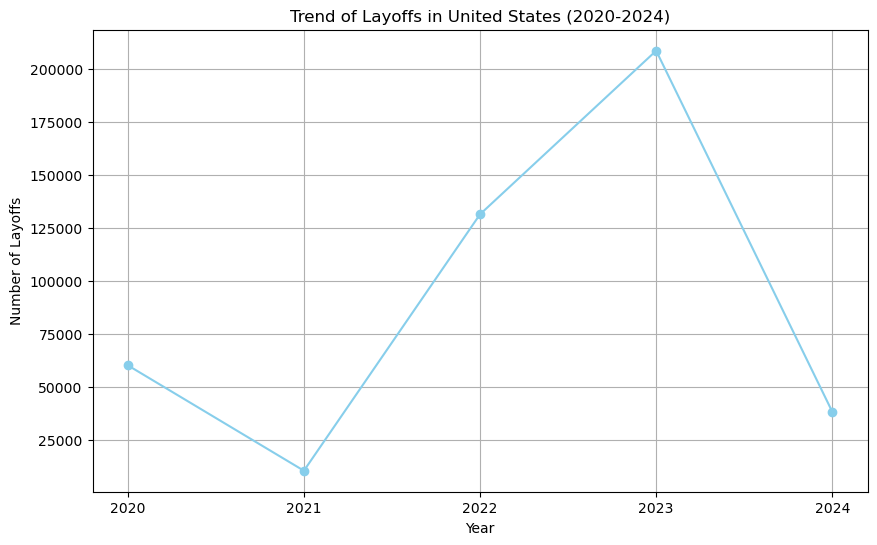

In [119]:
# Filter data for years between 2020 and 2024
US_layoffs_trend = US_df[(US_df['Year'] >= 2020) & (US_df['Year'] <= 2024)]

# Group filtered data by year and sum the layoff counts
US_layoffs_trend = US_layoffs_trend.groupby('Year')['Laid_Off_Count'].sum().reset_index()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(US_layoffs_trend['Year'], US_layoffs_trend['Laid_Off_Count'], marker='o', color='skyblue', linestyle='-')
plt.title('Trend of Layoffs in United States (2020-2024)')
plt.xlabel('Year')
plt.ylabel('Number of Layoffs')
plt.grid(True)
plt.xticks(range(2020, 2025))  # Ensure x-axis ticks include all years from 2020 to 2024
plt.show()



In [120]:
# Funds raised by the top companies with the highest layoffs
top_companies_funds = US_df[US_df['Company'].isin(top_companies_layoffs['Company'])][['Company', 'Funds_Raised']]
top_companies_funds = top_companies_funds.drop_duplicates().sort_values(by='Funds_Raised', ascending=False)

top_companies_funds 

NameError: name 'top_companies_layoffs' is not defined

Microft 1 million

In [121]:
# Distribution of layoffs across different company stages in US
stage_avg_layoffs = US_df.groupby('Stage')['Laid_Off_Count'].mean().sort_values(ascending=False)
stage_median_layoffs = US_df.groupby('Stage')['Laid_Off_Count'].median().sort_values(ascending=False)

stage_layoffs_analysis = pd.DataFrame({
    'Average Layoffs': stage_avg_layoffs,
    'Median Layoffs': stage_median_layoffs
}).reset_index()

stage_layoffs_analysis

Stage  Average Layoffs  Median Layoffs
0         Acquired       193.220657            80.0
1         Post-IPO       463.325217           102.0
2   Private Equity       125.341463            80.0
3             Seed        60.812500            80.0
4         Series A        58.744000            80.0
5         Series B        73.554217            80.0
6         Series C        79.277992            80.0
7         Series D        90.512077            80.0
8         Series E       117.603448            80.0
9         Series F       126.753247            80.0
10        Series G       130.666667            80.0
11        Series H       246.565217           100.0
12        Series I        91.666667            80.0
13        Series J              NaN             NaN
14      Subsidiary       179.909091            80.0
15         Unknown       116.647651            80.0

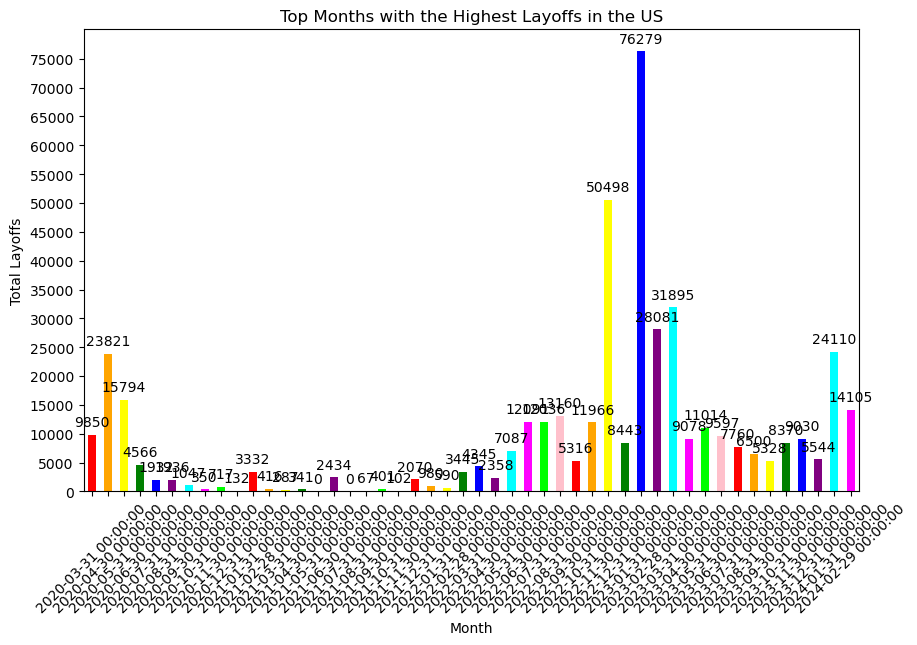

In [133]:
# Define colors for the bar graph
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'cyan', 'magenta', 'lime', 'pink']

# Plot the bar graph
plt.figure(figsize=(10, 6))
monthly_layoffs.plot(kind='bar', color=colors)
plt.title('Top Months with the Highest Layoffs in the US')
plt.xlabel('Month')
plt.ylabel('Total Layoffs')
plt.xticks(rotation=45)
plt.yticks(range(0, monthly_layoffs.max() + 1000, 5000))
for i, value in enumerate(monthly_layoffs):
    plt.text(i, value + 1000, str(value), ha='center', va='bottom', fontsize=10, color='black')

plt.show()



In [124]:
# Companies in US with high funds raised and significant layoffs
top_funded_companies_with_layoffs = US_df.sort_values(by=['Funds_Raised', 'Laid_Off_Count'], ascending=[False, False]).head(10)

top_funded_companies_with_layoffs[['Company', 'Funds_Raised', 'Laid_Off_Count', 'Industry', 'Stage','Year']]

Company  Funds_Raised  Laid_Off_Count        Industry     Stage  Year
2519  Netflix      121900.0             300           Media  Post-IPO  2022
2708  Netflix      121900.0             150           Media  Post-IPO  2022
2098  Netflix      121900.0              30           Media  Post-IPO  2022
2744  Netflix      121900.0              25           Media  Post-IPO  2022
190     Xerox       27200.0            3000        Hardware  Post-IPO  2024
1870     Meta       26000.0           11000        Consumer  Post-IPO  2022
1061     Meta       26000.0           10000        Consumer  Post-IPO  2023
396      Meta       26000.0              80        Consumer  Post-IPO  2023
716      Uber       25200.0             200  Transportation  Post-IPO  2023
3058     Uber       24700.0            3700  Transportation  Post-IPO  2020

## 1.What is the distribution of layoffs across different Head Quaters in the United States, and which states constitute the top 10 in terms of the highest total layoffs?

In [125]:
# Find the number of unique headquarters
num_headquarters = US_df['Location_HQ'].nunique()

print(f"The number of headquarters in the dataset is: {num_headquarters}")


The number of headquarters in the dataset is: 110


In [126]:
# Grouping data by 'Location_HQ' (state) and summing up 'Laid_Off_Count' within each state
location_layoffs = US_df.groupby('Location_HQ')['Laid_Off_Count'].sum()

# Sorting the locations by total layoffs and selecting the top 10
top_10_locations_layoffs = location_layoffs.sort_values(ascending=False).head(15)

print("locations with the highest total layoffs:")
print(top_10_locations_layoffs)


locations with the highest total layoffs:
Location_HQ
SF Bay Area        204127
Seattle             56146
New York City       44041
Boston              21241
Los Angeles         13985
Austin              13849
Chicago              9415
Boise                7435
Phoenix              6161
San Diego            6116
Miami                4660
Philadelphia         3826
Washington D.C.      3755
Salt Lake City       3548
Columbus             3320
Name: Laid_Off_Count, dtype: int32


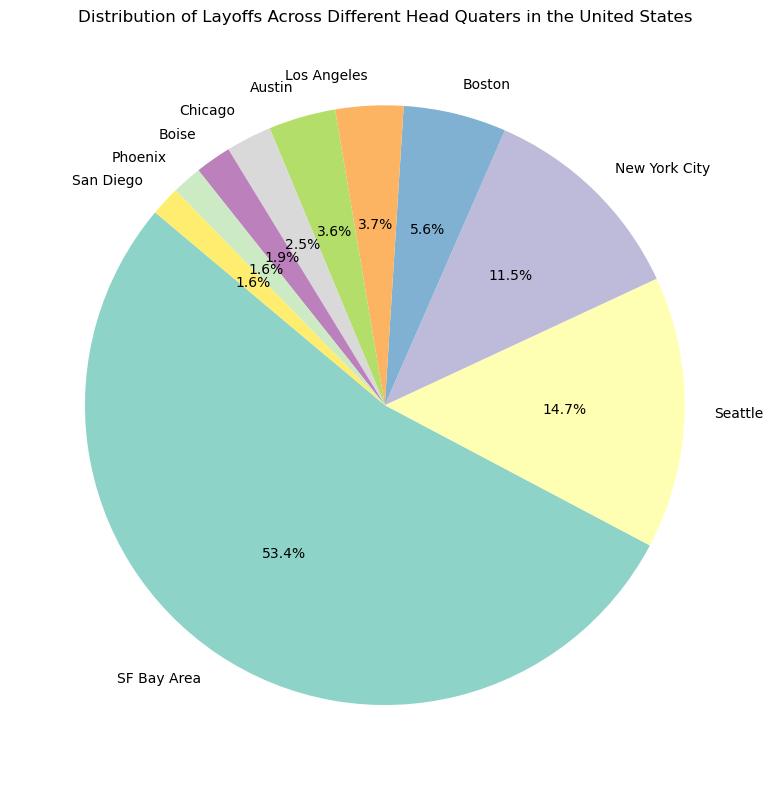

In [128]:
# Grouping data by 'Location_HQ' (state) and summing up 'Laid_Off_Count' within each state
state_layoffs = US_df.groupby('Location_HQ')['Laid_Off_Count'].sum()

# Sorting the states by total layoffs
state_layoffs_sorted = state_layoffs.sort_values(ascending=False).head(10)

# Plotting the distribution of layoffs across different Head Quaters as a pie chart
plt.figure(figsize=(8, 8))
state_layoffs_sorted.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='Set3')
plt.title('Distribution of Layoffs Across Different Head Quaters in the United States')
plt.ylabel('')  # Removing the y-label
plt.tight_layout()
plt.show()


## 2.Are there any notable trends or patterns in the timing of layoffs within top 4 industries in the United States?

C:\Users\jasvi\AppData\Local\Temp\ipykernel_47068\1705016204.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



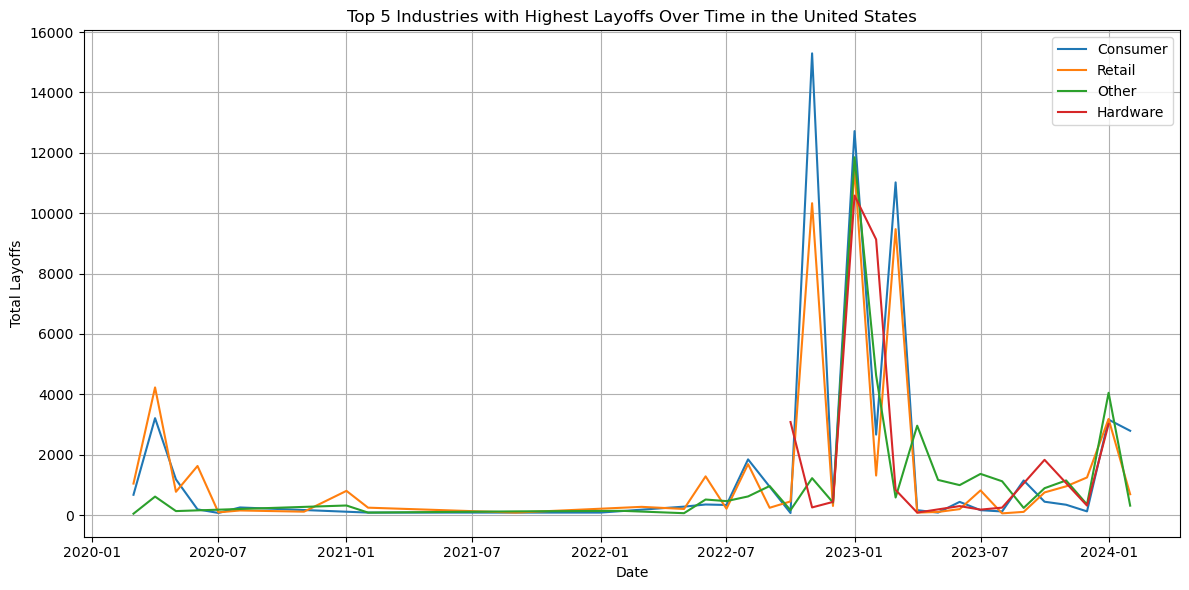

In [129]:
# Convert 'Year' and 'Month' columns to datetime format
US_df['Date'] = pd.to_datetime(US_df['Year'].astype(str) + '-' + US_df['Month'].astype(str), format='%Y-%m')

# Find the top 4 industries with the highest total layoffs
top_5_industries = US_df.groupby('Industry')['Laid_Off_Count'].sum().nlargest(4).index

# Plotting top 5 industries
plt.figure(figsize=(12, 6))
for industry in top_5_industries:
    industry_layoffs_over_time = US_df[US_df['Industry'] == industry].groupby('Date')['Laid_Off_Count'].sum()
    plt.plot(industry_layoffs_over_time.index, industry_layoffs_over_time.values, label=industry)

plt.title('Top 5 Industries with Highest Layoffs Over Time in the United States')
plt.xlabel('Date')
plt.ylabel('Total Layoffs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Are there any specific months or quarters within the year that tend to have higher layoff activity in the United States?

C:\Users\jasvi\AppData\Local\Temp\ipykernel_47068\1192397817.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



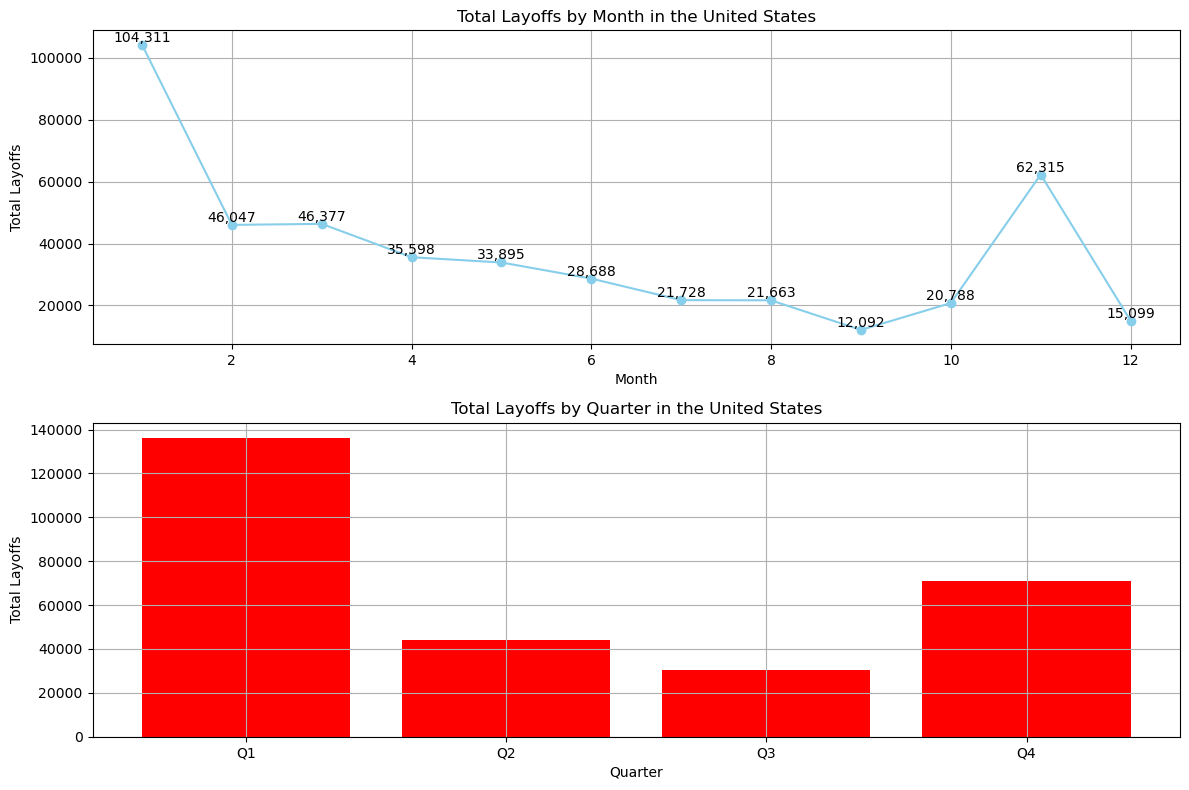

In [130]:
# Convert 'Year', 'Month', and 'Day' columns to datetime format
US_df['Date'] = pd.to_datetime(US_df[['Year', 'Month', 'Day']])

# Group data by month and quarter, and sum up 'Laid_Off_Count' within each group
layoffs_by_month = US_df.groupby(US_df['Date'].dt.month)['Laid_Off_Count'].sum()
layoffs_by_quarter = US_df.groupby(US_df['Date'].dt.to_period('Q'))['Laid_Off_Count'].sum()

# Plotting the trend of layoffs over time
plt.figure(figsize=(12, 8))

# Plotting layoffs by month
plt.subplot(2, 1, 1)
plt.plot(layoffs_by_month.index, layoffs_by_month.values, marker='o', linestyle='-', color='skyblue')
for month, value in zip(layoffs_by_month.index, layoffs_by_month.values):
    plt.text(month, value, f'{value:,}', ha='center', va='bottom')
plt.title('Total Layoffs by Month in the United States')
plt.xlabel('Month')
plt.ylabel('Total Layoffs')
plt.grid(True)

# Plotting layoffs by quarter
plt.subplot(2, 1, 2)
quarters = [f'Q{q}' for q in layoffs_by_quarter.index.quarter]
plt.bar(quarters, layoffs_by_quarter.values, color='red')
plt.title('Total Layoffs by Quarter in the United States')
plt.xlabel('Quarter')
plt.ylabel('Total Layoffs')
plt.grid(True)

plt.tight_layout()
plt.show()


## What is the relationship between the location of companies within the United States and the extent of their layoffs and fundraising activities? 

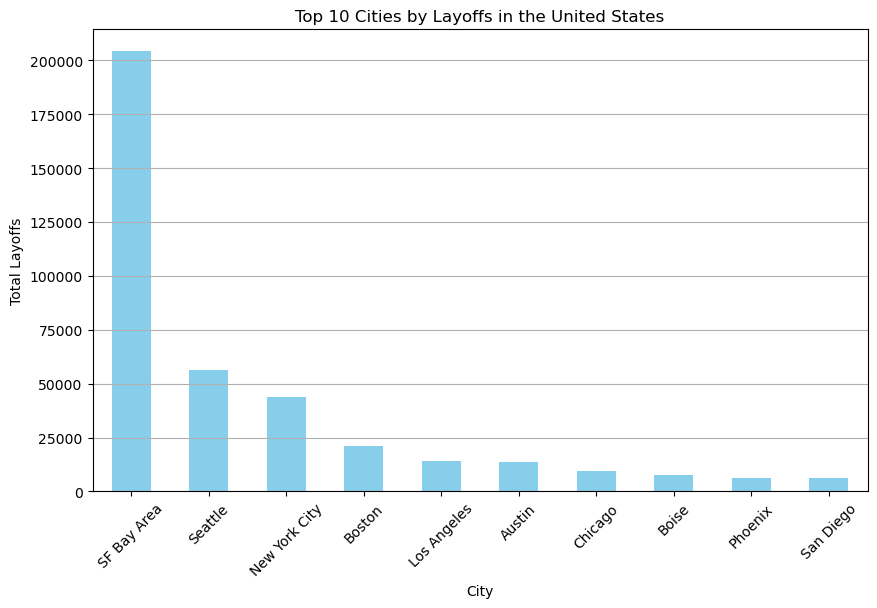

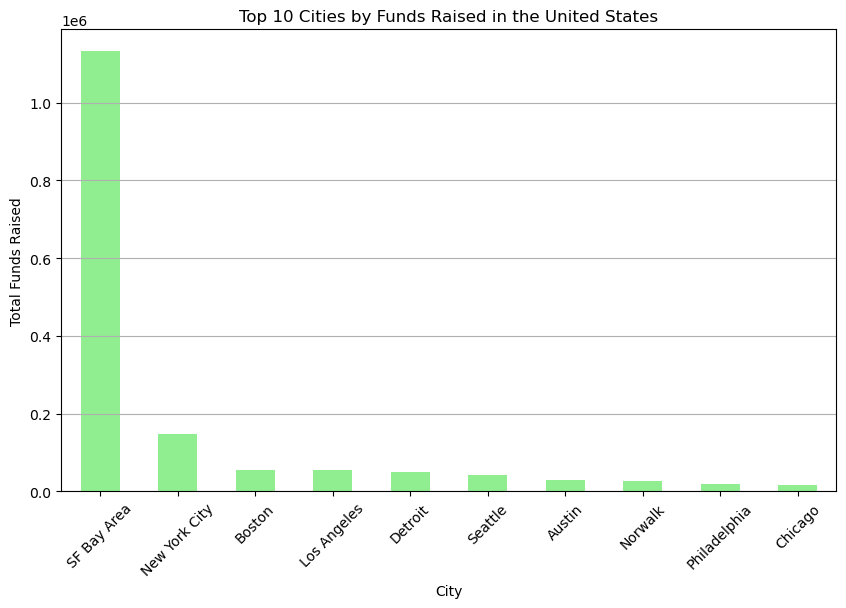

In [131]:
# Group data by city and sum up the layoffs for each city
layoffs_by_city = US_df.groupby('Location_HQ')['Laid_Off_Count'].sum()

# Sort the cities by the number of layoffs in descending order and select the top 10
top_10_layoffs_cities = layoffs_by_city.sort_values(ascending=False).head(10)

# Plotting top 10 cities by layoffs
plt.figure(figsize=(10, 6))
top_10_layoffs_cities.plot(kind='bar', color='skyblue')
plt.title('Top 10 Cities by Layoffs in the United States')
plt.xlabel('City')
plt.ylabel('Total Layoffs')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Group data by city and sum up the funds raised for each city
funds_raised_by_city = US_df.groupby('Location_HQ')['Funds_Raised'].sum()

# Sort the cities by funds raised in descending order and select the top 10
top_10_funds_raised_cities = funds_raised_by_city.sort_values(ascending=False).head(10)

# Plotting top 10 cities by funds raised
plt.figure(figsize=(10, 6))
top_10_funds_raised_cities.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Cities by Funds Raised in the United States')
plt.xlabel('City')
plt.ylabel('Total Funds Raised')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


C:\Users\jasvi\AppData\Local\Temp\ipykernel_47068\3308177451.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jasvi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



Mean Squared Error: 348556666.21870595


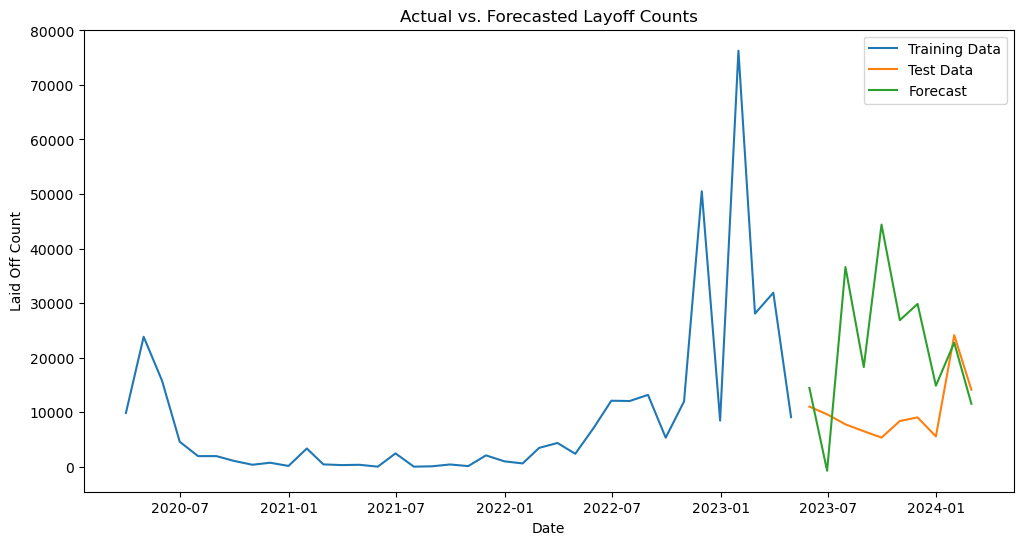

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Assuming your DataFrame is named US_df and contains 'Date' and 'Laid_Off_Count' columns
# Convert 'Date' column to datetime format
US_df['Date'] = pd.to_datetime(US_df['Date'])

# Set 'Date' column as index
US_df.set_index('Date', inplace=True)

# Resample data to a monthly frequency and sum layoff counts
monthly_layoffs = US_df['Laid_Off_Count'].resample('M').sum()

# Split data into training and testing sets
train_size = int(len(monthly_layoffs) * 0.8)
train, test = monthly_layoffs[:train_size], monthly_layoffs[train_size:]

# Define and fit ARIMA model
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()

# Forecast layoff counts
forecast = model_fit.forecast(steps=len(test))

# Calculate mean squared error
mse = mean_squared_error(test, forecast)
print('Mean Squared Error:', mse)

# Plot actual vs. forecasted layoff counts
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(test.index, forecast, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Laid Off Count')
plt.title('Actual vs. Forecasted Layoff Counts')
plt.legend()
plt.show()
